In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, display # jupyter 사진넣기

import matplotlib as mpl               # 한글깨짐
import matplotlib.font_manager as fm   # 한글깨짐
import matplotlib.font_manager         # 한글깨짐

In [2]:
df = pd.read_csv('data/NHIS_total_visual.csv')
df.head(3)

,기준년도,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부
0,2009,2,1,26,145.0,40.0,62.0,1.0,1.0,1.0,...,90.0,12.9,1.0,0.7,22.0,24.0,11.0,1.0,0.0,0.0
1,2009,2,1,11,145.0,40.0,67.0,1.2,1.2,1.0,...,120.0,13.5,1.0,0.5,22.0,16.0,12.0,1.0,0.0,1.0
2,2009,2,1,43,145.0,45.0,64.0,1.5,1.5,1.0,...,124.0,12.8,1.0,1.2,21.0,12.0,10.0,1.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8774860 entries, 0 to 8774859
Data columns (total 27 columns):
기준년도           int64
성별코드           int64
연령대코드(5세단위)    int64
시도코드           int64
신장(5Cm단위)      float64
체중(5Kg단위)      float64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST     float64
(혈청지오티)ALT     float64
감마지티피          float64
흡연상태           float64
음주여부           float64
구강검진수검여부       float64
dtypes: float64(23), int64(4)
memory usage: 1.8 GB


In [4]:
df['기준년도'].value_counts()

2017    983258
2015    983245
2016    982299
2014    981919
2013    980255
2012    974749
2011    966421
2010    962189
2009    960525
Name: 기준년도, dtype: int64

In [5]:
# 한글깨짐 linux 
font_dirs = ['/home/sch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name][:3]

['NanumMyeongjo Eco', 'NanumMyeongjo', 'NanumGothicCoding']

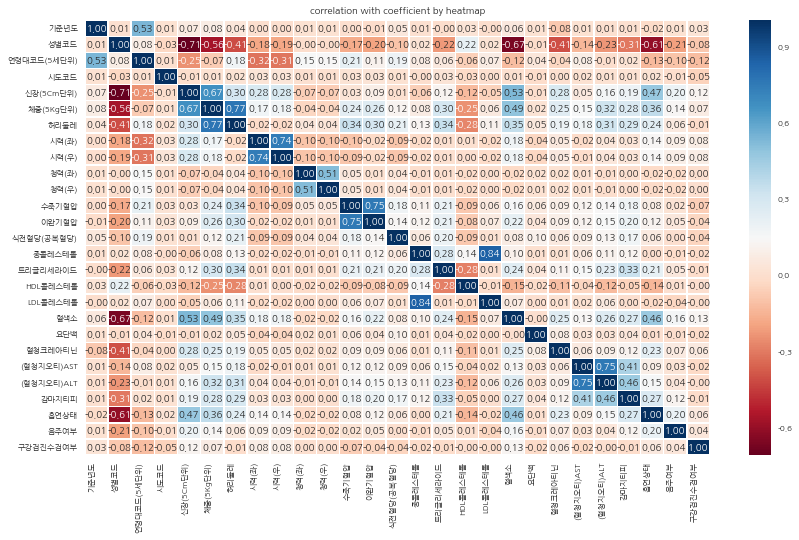

In [6]:
# 전체 상관관계도
def corr_plot(df):
    plt.figure(figsize=(14,8))
    sns.set(font_scale=0.8)
    
#     font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#     mpl.rc('font', family=font_name) 
    
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    
    ax = sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='RdBu')
    ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right') 
    plt.title("correlation with coefficient by heatmap")
    plt.savefig('./img/visual/corr_plot.png',dpi=100, bbox_inches='tight')
    plt.show()
#     plt.close()
corr_plot(df)


In [7]:
#### pandas profile 

In [8]:
# 산점도, 추세선 lowess # 데이터가 많을 경우 시간이 많이 걸림 
# plt.figure(figsize=(14,8))
# sns.set(font_scale=1.2)
# ax=sns.regplot('총콜레스테롤', 'LDL콜레스테롤', lowess=True, data = df)
# ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right') 
# plt.title("산점도 및 회귀추세선 (양 상관도 높은 feature)")
# plt.savefig('./img/visual/reg_plot.png',dpi=100, bbox_inches='tight')
# plt.show()

In [9]:
# pairplot + 커널밀도함수로  겹침 ==> 군집화 정도 # 시간이 너무 많이 걸림(feature, data 적은 곳에 )
# def pairplot_(df):     
#     plt.figure(figsize=(14,8))
#     sns.set(font_scale=0.8)
#     g = sns.PairGrid(df)
#     g.map_upper(sns.scatterplot)
#     g.map_diag(sns.distplot, kde=True)
#     # g.map_lower(sns.kdeplot, levels=3, fill=True) # levels 군집화 level
#     g.map_lower(sns.kdeplot, levels=3, fill=True,  height=10, aspect=0.9) # levels 군집화 level # height 
# pairplot_(df)

## visual

#### target target_CAT 생성
* 식전혈당(공복혈당) 3가지로 분류
* 당뇨(>=126), 공복혈당장애(100<= <126) , 정상(<100)

### 분류기준 출처 : 대한당뇨병학회발간 2019 당뇨병 진료지침
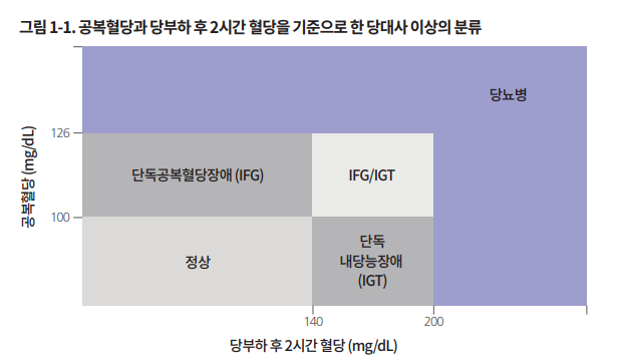

In [10]:
cat_mapping = {
1: "당뇨 126이상",
2: "공복혈당장애 100 ~ 125미만",
3: "정상 100미만"
}

In [11]:
df['target'] = df['식전혈당(공복혈당)'].apply(lambda x: 1 if x >= 126 else ( 2 if 100 <= x < 126 else 3))
df['target'].value_counts()

3    5894501
2    2300741
1     579618
Name: target, dtype: int64

In [12]:
tmp_lst = df['target'].value_counts().values
print(f'당뇨(target) {np.round((tmp_lst[2]/tmp_lst.sum())*100, 2)}%')
print(f'공복혈당장애(target) {np.round((tmp_lst[1]/tmp_lst.sum())*100, 2)}%')
print(f'정상(target) {np.round((tmp_lst[0]/tmp_lst.sum())*100, 2)}%')

당뇨(target) 6.61%
공복혈당장애(target) 26.22%
정상(target) 67.17%


In [13]:
df['target_CAT'] = df['target'].map(cat_mapping)

#### category feature decoding

In [14]:
cat_mapping = {
11: "서울특별시",
26: "부산광역시",
27: "대구광역시",
28: "인천광역시",
29: "광주광역시",
30: "대전광역시",
31: "울산광역시",
36: "세종특별자치시",
41: "경기도",
42: "강원도",
43: "충청북도",
44: "충청남도",
45: "전라북도",
46: "전라남도",
47: "경상북도",
48: "경상남도",
50: "제주특별자치도"
}
df['시도코드_CAT'] = df['시도코드'].map(cat_mapping)
df[['시도코드','시도코드_CAT']].head(5)

,시도코드,시도코드_CAT
0,26,부산광역시
1,11,서울특별시
2,43,충청북도
3,41,경기도
4,44,충청남도


In [15]:
# df['column'].map(lambda x:func(x)) # df.apply(lambda x:func(x.name), axis=) 
df['연령대_CAT'] = df['연령대코드(5세단위)'].map(lambda x: f'{(15+5*x)} ~ {(19 + 5*x)}')
print(df[['연령대코드(5세단위)' ,'연령대_CAT']].head(5))

   연령대코드(5세단위)  연령대_CAT
0            1  20 ~ 24
1            1  20 ~ 24
2            1  20 ~ 24
3            1  20 ~ 24
4            1  20 ~ 24


In [16]:
cat_mapping = {
1: "남자",
2: "여자",
}
df['성별_CAT'] = df['성별코드'].map(cat_mapping)
df[['성별코드','성별_CAT']].head(5)

,성별코드,성별_CAT
0,2,여자
1,2,여자
2,2,여자
3,2,여자
4,2,여자


In [17]:
cat_mapping = {
 1 : "피우지 않는다",
 2 : "이전에 피웠으나 끊었다",
 3 : "현재도 피우고 있다"
}
df['흡연상태_CAT'] = df['흡연상태'].map(cat_mapping)
df[['흡연상태','흡연상태_CAT']].head(5)

,흡연상태,흡연상태_CAT
0,1.0,피우지 않는다
1,1.0,피우지 않는다
2,1.0,피우지 않는다
3,1.0,피우지 않는다
4,1.0,피우지 않는다


In [18]:
#  cat_mapping = {
#     0 : "마시지 않은다",
#     1 : "마신다"
#  }
# df['음주여부_CAT'] = df['음주여부'].map(cat_mapping)
# df[['음주여부','음주여부_CAT']].head(5)

In [19]:
 cat_mapping = {
     0 : "미수검",
     1 : "수검"
 }
df['구강검진수검_CAT'] = df['구강검진수검여부'].map(cat_mapping)
df[['구강검진수검여부', '구강검진수검_CAT']].head(5)

,구강검진수검여부,구강검진수검_CAT
0,0.0,미수검
1,1.0,수검
2,1.0,수검
3,0.0,미수검
4,1.0,수검


In [20]:
 cat_mapping = {
     1 : "정상",
     2 : "비정상"
 }
df['청력(좌)_CAT'] = df['청력(좌)'].map(cat_mapping)
df[['청력(좌)', '청력(좌)_CAT']].head(5)

,청력(좌),청력(좌)_CAT
0,1.0,정상
1,1.0,정상
2,1.0,정상
3,1.0,정상
4,1.0,정상


In [21]:
 cat_mapping = {
     1 : "정상",
     2 : "비정상"
 }
df['청력(우)_CAT'] = df['청력(우)'].map(cat_mapping)
df[['청력(우)', '청력(우)_CAT']].head(5)

,청력(우),청력(우)_CAT
0,1.0,정상
1,1.0,정상
2,1.0,정상
3,1.0,정상
4,1.0,정상


In [22]:
df.columns

Index(['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       'target', 'target_CAT', '시도코드_CAT', '연령대_CAT', '성별_CAT', '흡연상태_CAT',
       '구강검진수검_CAT', '청력(좌)_CAT', '청력(우)_CAT'],
      dtype='object')

### BMI
* BMI(체질량지수)는 원래feature에는 없으나 건강검진결과지에 체중과 신장 수치를 바탕으로 계산되어 활용되고 있음
* bmi = 체중(kg)/신장(m)^2
* 18.5 ~ 25미만 정상, 25이상 과체중, 30이상 고도비만
* 한글명칭으로 apply함수 적용이 안되어 df['W'],df['H']생성 처리

In [23]:
df['W'] = df['체중(5Kg단위)']
df['H'] = df['신장(5Cm단위)']
# df['BMI'] = df.apply(lambda x: (x.'체중(5Kg단위)')/(x.'신장(5Cm단위)')**2, axis = 1)
df['BMI'] = df.apply(lambda x: (x.W)/(x.H/100)**2, axis = 1)
df['BMI'].head(5)
# apply(lambda x: np.square(x) if x.name == 'z' else x)   

0    19.024970
1    19.024970
2    21.403092
3    21.403092
4    23.781213
Name: BMI, dtype: float64

In [24]:
cat_mapping = {
     0 : "저체중 18.5 미만",
     1 : "정상 18.5 ~ 25미만",
     2 : "과체중 25 ~ 30미만",
     3 : "고도비만 30 이상"
 }
df['BMI_CAT'] = df['BMI'].apply(lambda x:0 if x<18.5 else (1 if 18.5 <= x < 25 else(2 if 25 <= x<30 else 3))).map(cat_mapping)
df['BMI_CAT'].head(5)

0    정상 18.5 ~ 25미만
1    정상 18.5 ~ 25미만
2    정상 18.5 ~ 25미만
3    정상 18.5 ~ 25미만
4    정상 18.5 ~ 25미만
Name: BMI_CAT, dtype: object

### 연령대코드(5세단위) 

In [25]:
# 40세 이상이면 9부터인데 공단문의결과 20세 이상 직장가입자도 검강검진을 받기 때문에 결과가 있음(1 ~)
df_age=df['연령대코드(5세단위)'].value_counts()
df_age

7     1017049
9      940584
6      822650
5      807756
8      776727
11     767204
10     710967
12     515750
3      473512
4      439801
13     426085
2      389201
14     216964
15     196024
1      119300
16      90765
17      52559
18      11962
Name: 연령대코드(5세단위), dtype: int64

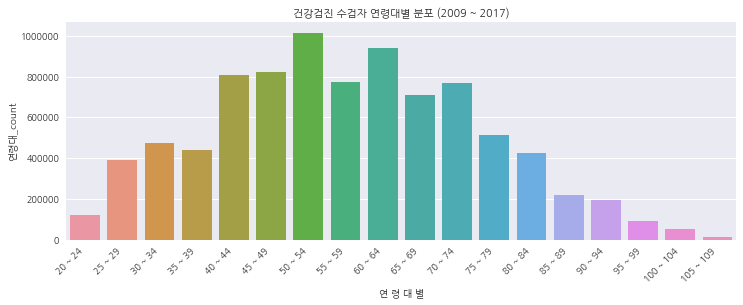

In [26]:
df_31=df.groupby(['연령대코드(5세단위)','연령대_CAT'])[[ '연령대_CAT']].count()
df_31.columns = ['연령대_count' ]
df_31 = df_31.reset_index()
df_31 = df_31.set_index('연령대_CAT')
df_31.head()

def Plot(df):

    plt.figure(figsize=(12,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['연령대_count'], data=df)
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('연 령 대 별')
    plt.title(f'건강검진 수검자 연령대별 분포 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/age.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_31)

In [27]:
df_age = df.groupby(['기준년도','연령대_CAT'])[['연령대코드(5세단위)']].count()
df_age.columns=["연령대코드_count"]
df_age = df_age.reset_index()
df_age = df_age.set_index('기준년도')

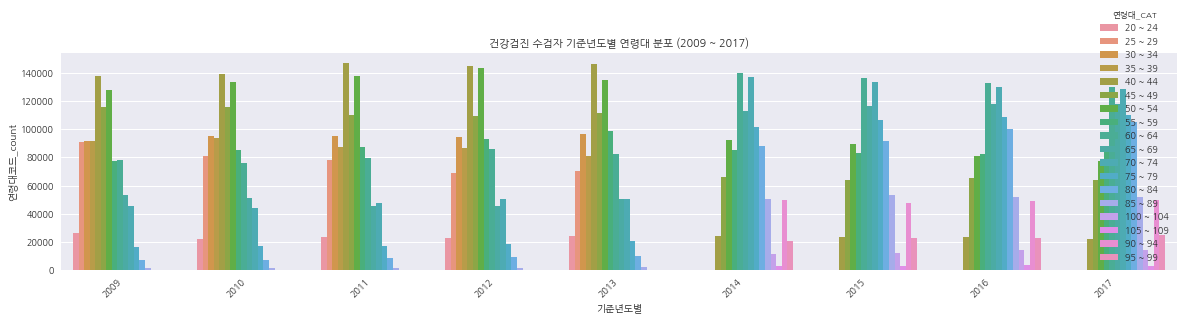

In [28]:
def Plot(df):

    plt.figure(figsize=(20,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['연령대코드_count'], data=df, hue="연령대_CAT")
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('기준년도별')
    plt.title(f'건강검진 수검자 기준년도별 연령대 분포 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/age_year.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_age)

### 연령대 시각화

#### Plot 1 연령대별 수치형 feature 평균값(mean)

#### 연령대_CAT가 object라서 정렬되지 않아서, '연령대코드(5세단위)'활용

In [29]:
# '연령대_CAT' object --> float  # error
# df['연령대_CAT'] = df['연령대_CAT'].astype('float64')

In [30]:
# df_1=df.groupby(['연령대코드(5세단위)', '연령대_CAT'], as_index=False).sum()
# df_1=df.groupby(['연령대코드(5세단위)']).sum()
# df_1=df.groupby(['연령대코드(5세단위)','연령대_CAT']).mean()
df_1=df.groupby(['연령대코드(5세단위)','연령대_CAT']).mean()[['BMI','신장(5Cm단위)','체중(5Kg단위)','허리둘레','시력(좌)', '시력(우)',
                                                   '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', '트리글리세라이드',
                                                   'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌',
                                                   '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']]
# print(df_1.head())
# df_1.index()  # MultiIndex' object is not callable
df_1.reset_index(level=['연령대코드(5세단위)'], inplace=True)
df_1.drop('연령대코드(5세단위)', axis=1, inplace=True)
df_1.head(5)

,BMI,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
연령대_CAT,,,,,,,,,,,,,,,,,,
20 ~ 24,21.476162,164.360645,58.369824,72.665256,1.037294,1.032242,113.971811,71.192448,87.300000,170.786655,82.705675,60.787779,94.171576,13.921402,0.882706,20.766412,17.541794,19.283571
25 ~ 29,22.299148,166.514012,62.306161,75.818569,1.064439,1.059266,116.342479,72.790920,88.708254,179.849420,101.822300,59.118450,101.170236,14.302452,0.910060,22.287867,22.109740,26.238293
30 ~ 34,23.315231,167.827552,66.097100,79.278578,1.096319,1.092637,118.549610,74.394940,91.382544,188.480383,125.970919,55.814828,108.357845,14.575995,0.931147,23.907259,26.748967,34.113777
35 ~ 39,23.625375,166.967947,66.222371,80.242178,1.125474,1.120967,119.839718,75.560481,93.948268,192.940328,137.970580,54.550897,111.811888,14.515912,0.939274,24.568327,27.502516,38.407648
40 ~ 44,23.383147,163.816320,63.069231,78.627714,1.070216,1.065477,118.786078,74.808955,94.876642,191.886490,124.474846,56.478336,111.252066,14.004133,0.884920,23.873529,24.299265,34.363091


In [31]:
### 소수점이하가 너무 길어 round처리하려고 하였음
# df_1.applymap(lambda x: round(x)) # 그대로
# df_1.applymap(lambda x: float(f'{x:.2f}')) # 그대로
# df_1.applymap(lambda x: f'{x:.2f}') # 그대로
# df_1.applymap(lambda x: {0:.2f}.format(x))

# f = lambda x: pd.Series([x.round]) # 그대로
# df_1.apply(f)

df_2=np.around(df_1.applymap(lambda x: x))
df_2.head(5)

,BMI,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
연령대_CAT,,,,,,,,,,,,,,,,,,
20 ~ 24,21.0,164.0,58.0,73.0,1.0,1.0,114.0,71.0,87.0,171.0,83.0,61.0,94.0,14.0,1.0,21.0,18.0,19.0
25 ~ 29,22.0,167.0,62.0,76.0,1.0,1.0,116.0,73.0,89.0,180.0,102.0,59.0,101.0,14.0,1.0,22.0,22.0,26.0
30 ~ 34,23.0,168.0,66.0,79.0,1.0,1.0,119.0,74.0,91.0,188.0,126.0,56.0,108.0,15.0,1.0,24.0,27.0,34.0
35 ~ 39,24.0,167.0,66.0,80.0,1.0,1.0,120.0,76.0,94.0,193.0,138.0,55.0,112.0,15.0,1.0,25.0,28.0,38.0
40 ~ 44,23.0,164.0,63.0,79.0,1.0,1.0,119.0,75.0,95.0,192.0,124.0,56.0,111.0,14.0,1.0,24.0,24.0,34.0


#### plot 연령대별 평균값

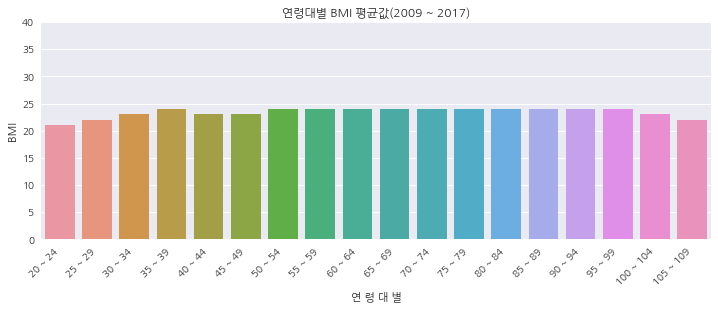

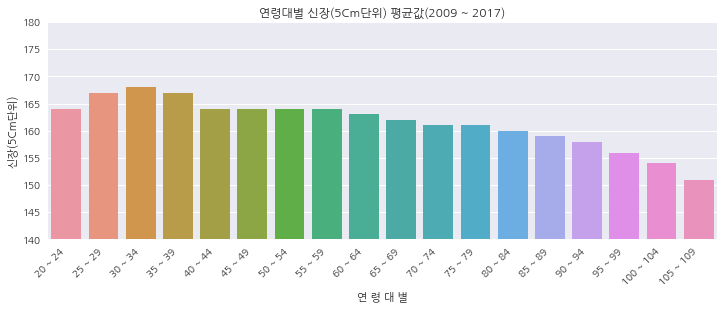

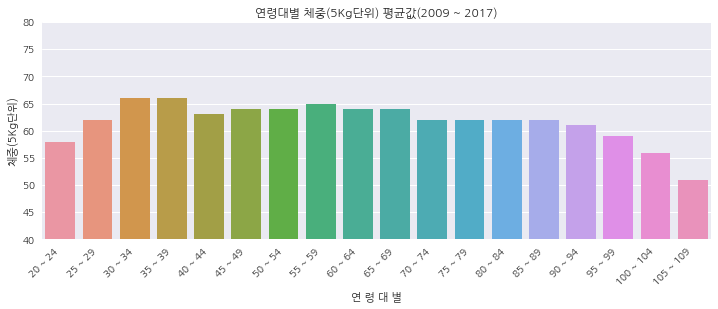

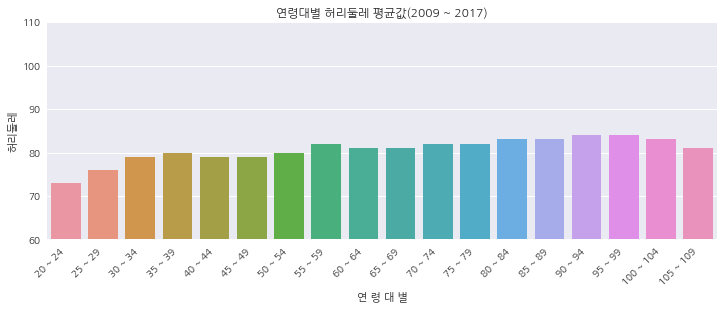

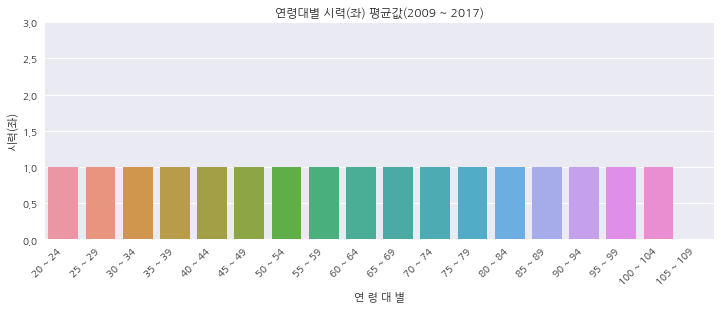

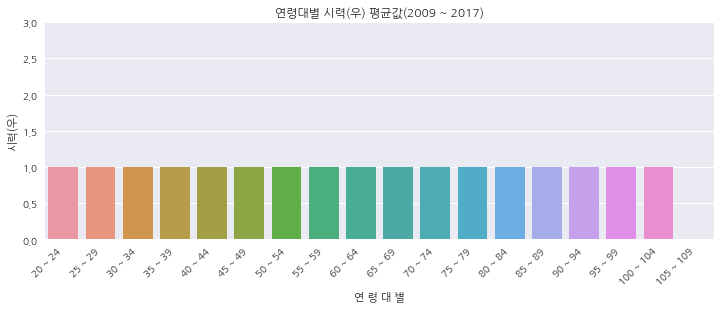

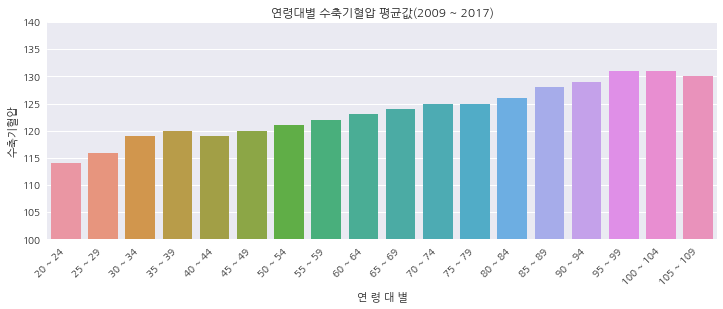

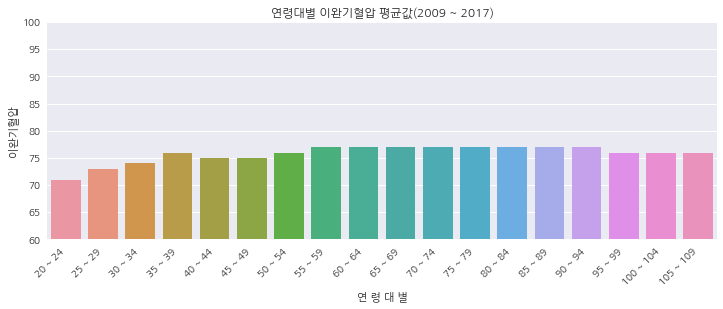

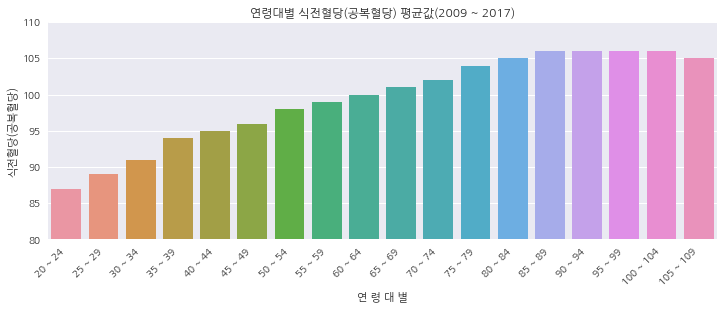

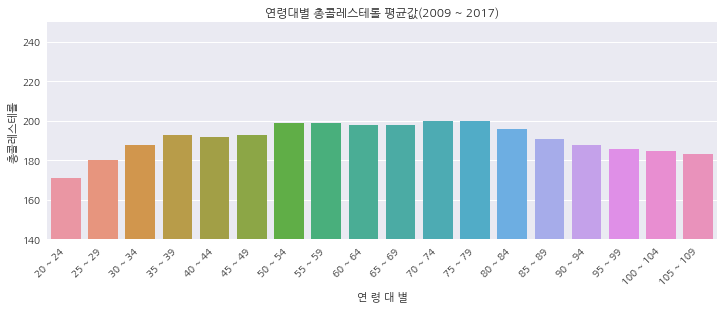

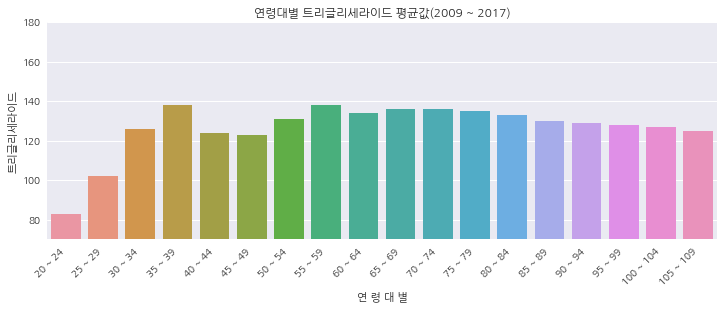

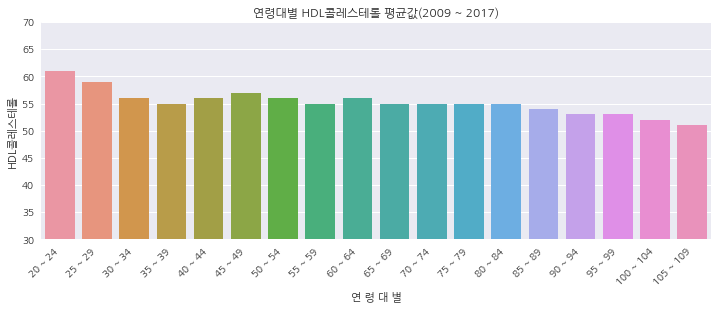

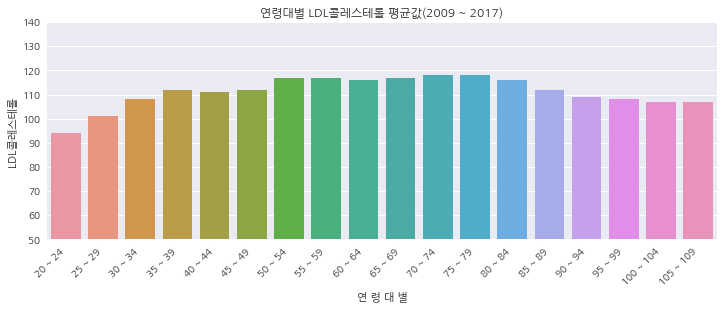

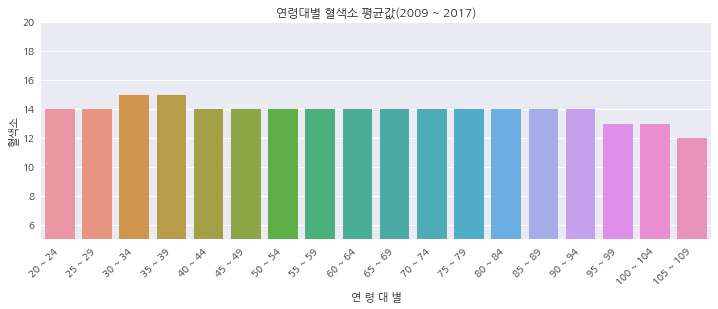

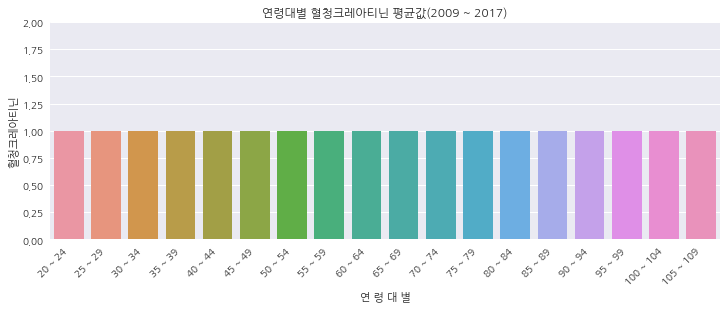

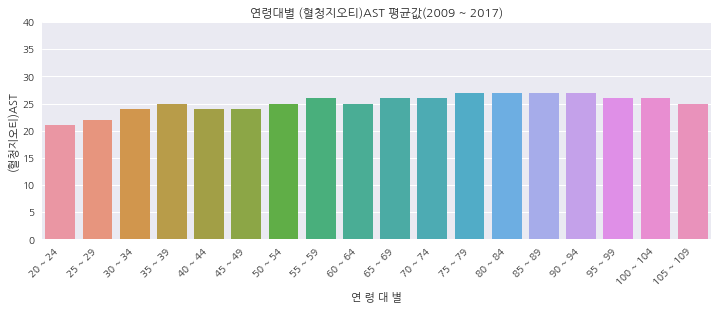

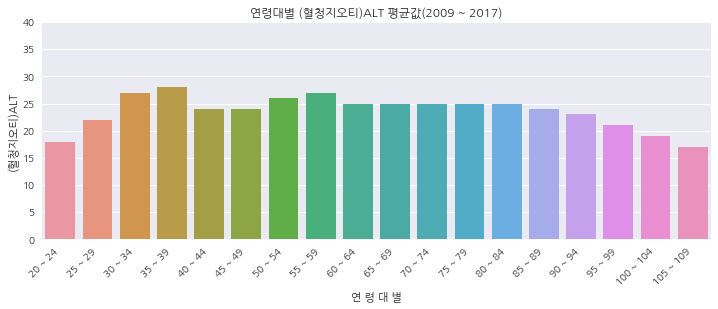

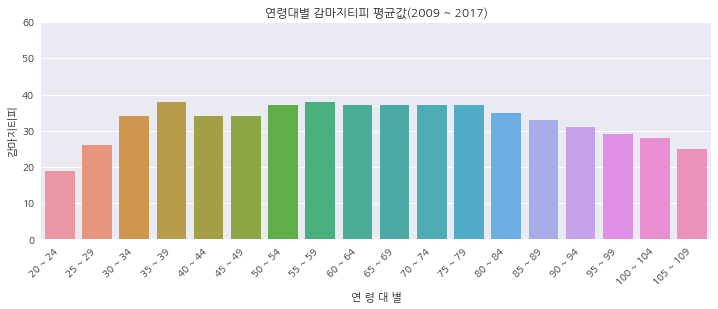

In [32]:
## ylim에 대해서 tuple로 value로 조정
temp_dict={'BMI': (0,40),
           '신장(5Cm단위)': (140,180),
           '체중(5Kg단위)': (40,80),
           '허리둘레' : (60, 110),
           '시력(좌)' : (0, 3),
           '시력(우)' : (0, 3),
           '수축기혈압' : (100,140),
           '이완기혈압' : (60,100),
           '식전혈당(공복혈당)' : (80,110),
           '총콜레스테롤' : (140,250),
           '트리글리세라이드' : (70,180),
           'HDL콜레스테롤' : (30,70),
           'LDL콜레스테롤' : (50,140),
           '혈색소' : (5, 20),
           '혈청크레아티닌' : (0, 2),
           '(혈청지오티)AST' : (0, 40),
           '(혈청지오티)ALT' : (0, 40),
           '감마지티피' : (0, 60)
          }
# temp_lst=['BMI', '신장(5Cm단위)', '체중(5Kg단위)','허리둘레','시력(좌)','시력(우)','청력(좌)', '청력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)',
#            '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤','LDL콜레스테롤', '혈색소','혈청크레아티닌','(혈청지오티)AST', '(혈청지오티)ALT',
#            '감마지티피' ]
def Plot(df):
#     for column in temp_lst:
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,4))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        # 한글깨짐 윈도우
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
        # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df)
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('연 령 대 별')
        plt.title(f'연령대별 {column} 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/age_{column}_mean.png" ,dpi=150, bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_2)

#### Plot 2 연령별 성별 수치형 feature 평균값

In [33]:
df.columns

Index(['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       'target', 'target_CAT', '시도코드_CAT', '연령대_CAT', '성별_CAT', '흡연상태_CAT',
       '구강검진수검_CAT', '청력(좌)_CAT', '청력(우)_CAT', 'W', 'H', 'BMI', 'BMI_CAT'],
      dtype='object')

In [34]:
# df_3=df.groupby(['연령대코드(5세단위)','연령대_CAT', '성별_CAT']).mean()[['BMI','신장(5Cm단위)','체중(5Kg단위)','허리둘레','시력(좌)', '시력(우)',
#                                                    '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', '트리글리세라이드',
#                                                    'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌',
#                                                    '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',]]
df_3=df.groupby(['연령대코드(5세단위)','연령대_CAT', '성별_CAT']).mean()
df_4=np.around(df_3.applymap(lambda x: x))
df_4.reset_index(level=['연령대코드(5세단위)', '성별_CAT'], inplace=True)
df_4.drop('연령대코드(5세단위)', axis=1, inplace=True)

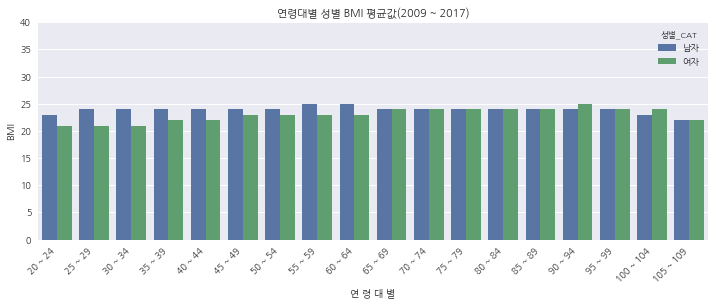

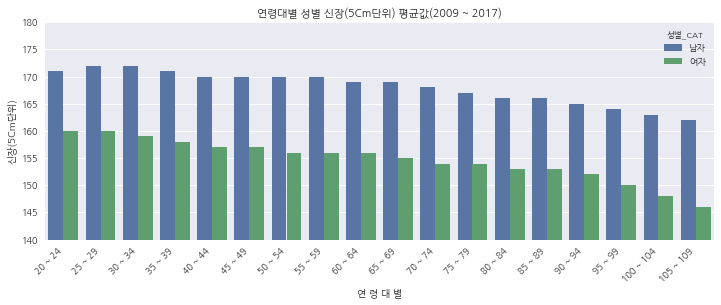

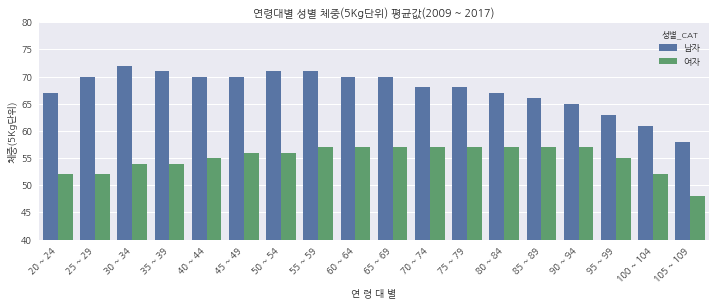

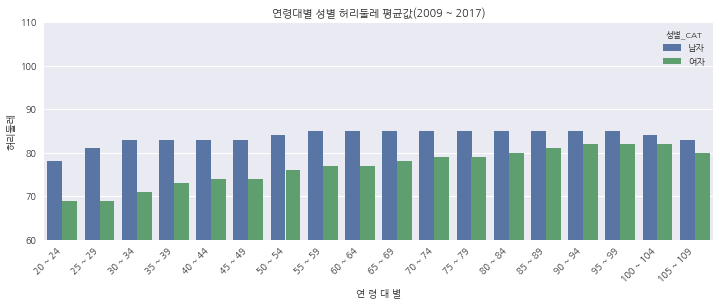

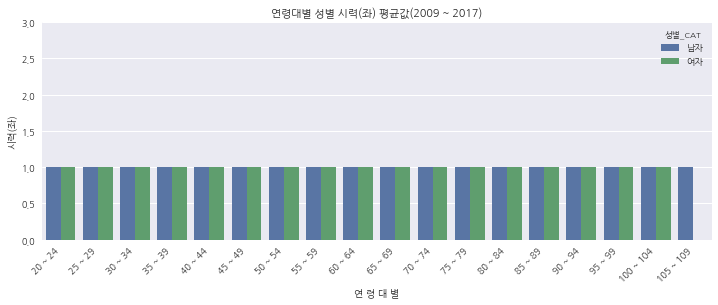

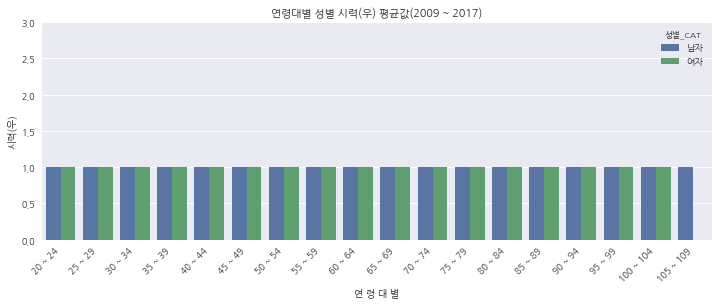

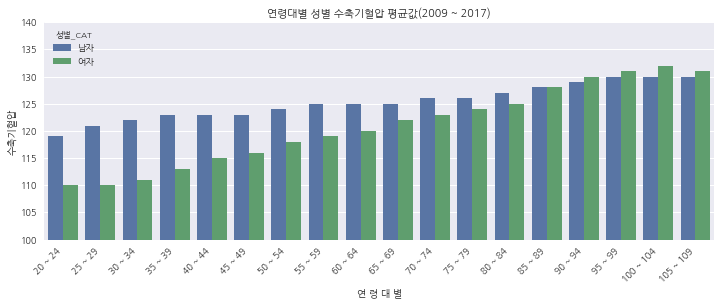

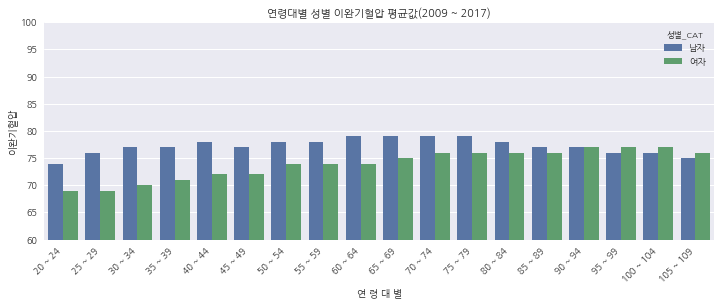

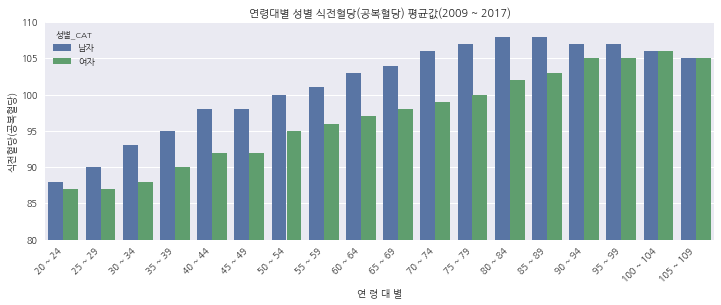

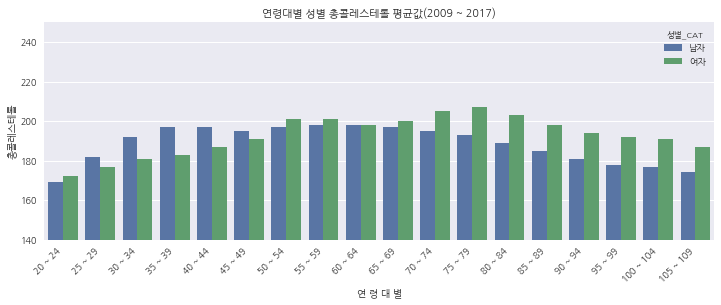

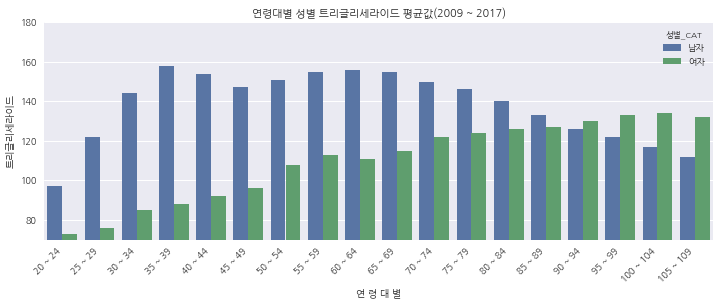

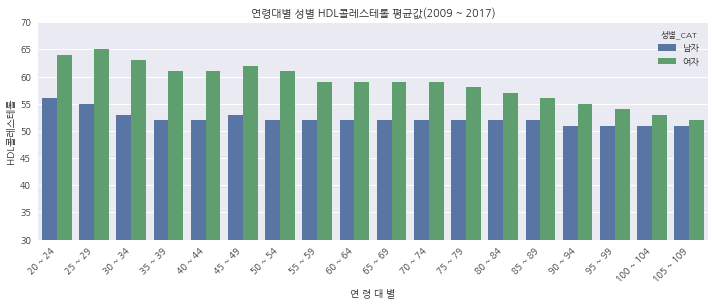

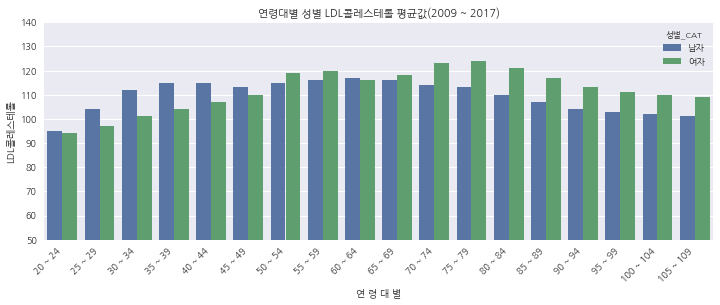

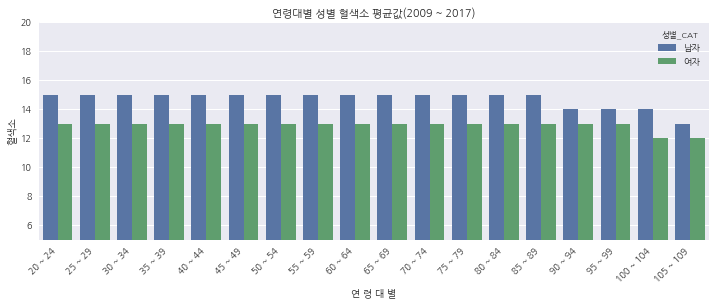

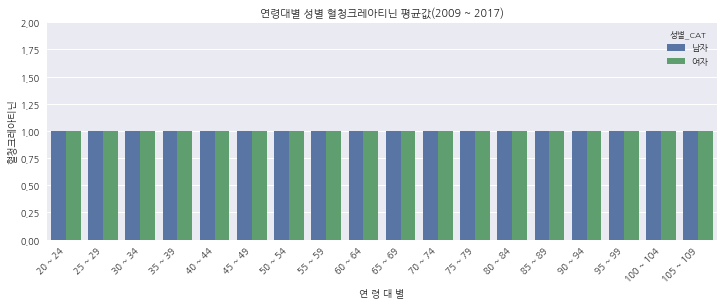

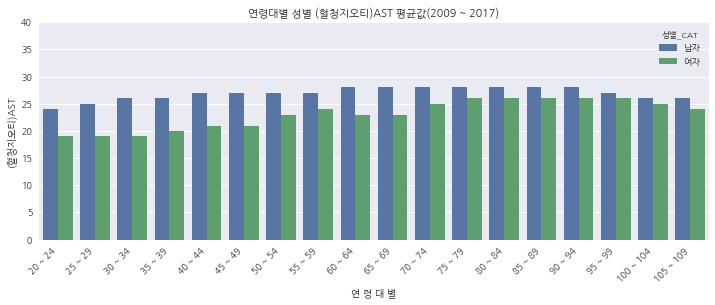

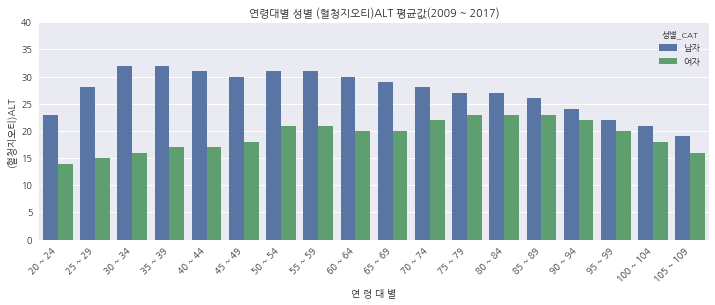

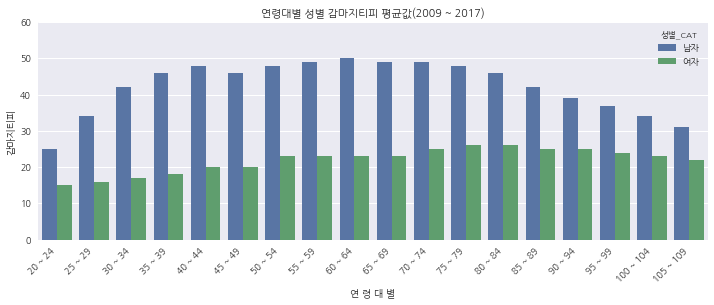

In [35]:
def Plot(df):
#     for column in temp_lst:
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,4))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=0.9)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)
        ax = sns.barplot(x=df.index, y=column, data=df, hue='성별_CAT')
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('연 령 대 별')
        plt.title(f'연령대별 성별 {column} 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/age_sex_{column}_mean.png",dpi=150, bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_4)

In [36]:
#### 

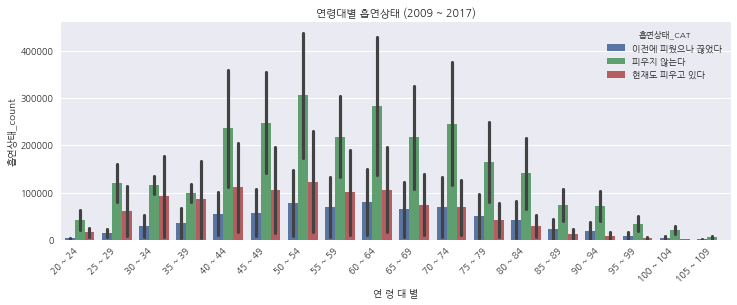

In [37]:
df_33=df.groupby(['연령대코드(5세단위)','연령대_CAT', '성별_CAT','흡연상태_CAT'])[[ '성별코드', '흡연상태']].count()
df_33.columns = ['성별코드_count','흡연상태_count' ]
df_33 = df_33.reset_index()
df_33 = df_33.set_index('연령대_CAT')
df_33.head()

def Plot(df):

    plt.figure(figsize=(12,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['흡연상태_count'], data=df, hue='흡연상태_CAT')
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('연 령 대 별')
    plt.title(f'연령대별 흡연상태 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/age_taboco_.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_33)

In [38]:
### if 음주여부 feature is

In [39]:
# df_34=df.groupby(['연령대코드(5세단위)','연령대_CAT','음주여부_CAT'])[[ '음주여부']].count()
# df_34.columns = ['음주여부_count' ]
# df_34 = df_34.reset_index()
# df_34 = df_34.set_index('연령대_CAT')

# def Plot(df):

#     plt.figure(figsize=(12,4))
# #     fig, ax =plt.figure(figsize=(8,4))
#     sns.set(font_scale=0.9)

# #         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
# #         mpl.rc('font', family=font_name) # ahronbd.ttf

#        # 한글깨짐 리눅스
#     mpl.rcParams['font.family'] = 'NanumGothic'
#     mpl.rc('axes', unicode_minus=False)
#     ax = sns.barplot(x=df.index, y=df['음주여부_count'], data=df, hue='음주여부_CAT')
# #         start, end = tup
# #         ax.set_ylim(start, end)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
#     ax.set_xlabel('연 령 대 별')
#     plt.title(f'연령대별 음주여부 (2009 ~ 2017)')
#     plt.savefig(f"./img/visual/age_alchol_.png",dpi=150, bbox_inches='tight')
#     plt.show()
#     #     plt.close()
# Plot(df_34)

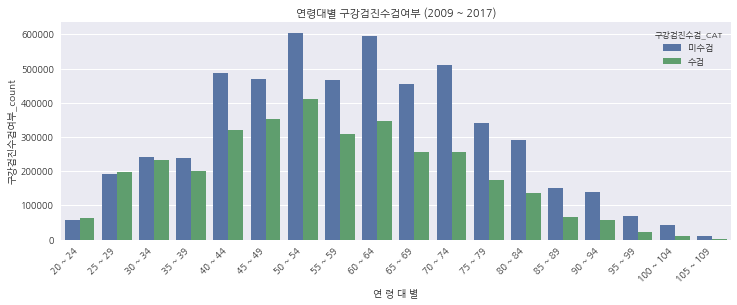

In [40]:
df_35=df.groupby(['연령대코드(5세단위)','연령대_CAT', '구강검진수검_CAT'])[[ '구강검진수검여부']].count()
df_35.columns = ['구강검진수검여부_count' ]
df_35 = df_35.reset_index()
df_35 = df_35.set_index('연령대_CAT')
# df_35.head()

def Plot(df):

    plt.figure(figsize=(12,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['구강검진수검여부_count'], data=df, hue='구강검진수검_CAT')
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('연 령 대 별')
    plt.title(f'연령대별 구강검진수검여부 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/age_gukang_.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_35)

In [41]:
df.columns

Index(['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       'target', 'target_CAT', '시도코드_CAT', '연령대_CAT', '성별_CAT', '흡연상태_CAT',
       '구강검진수검_CAT', '청력(좌)_CAT', '청력(우)_CAT', 'W', 'H', 'BMI', 'BMI_CAT'],
      dtype='object')

## 연도별

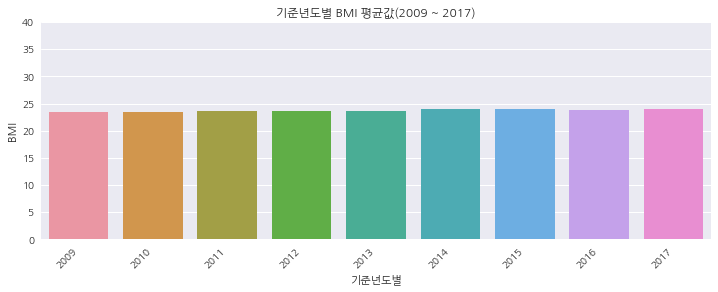

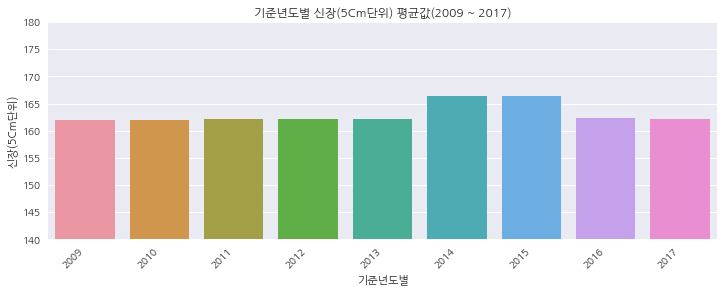

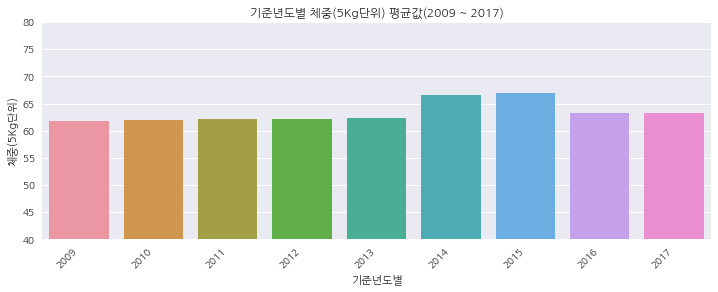

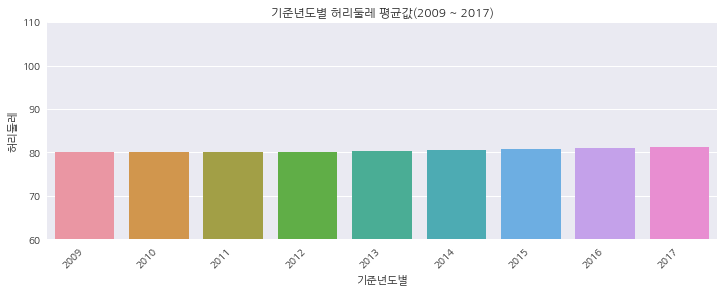

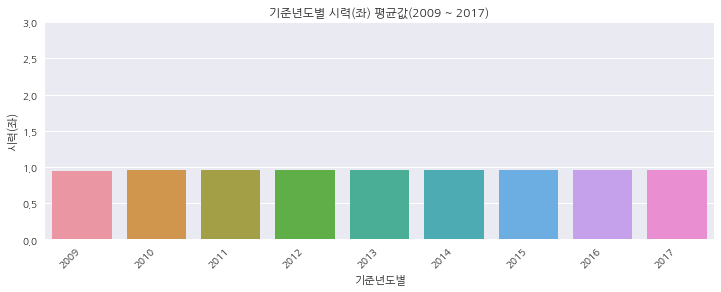

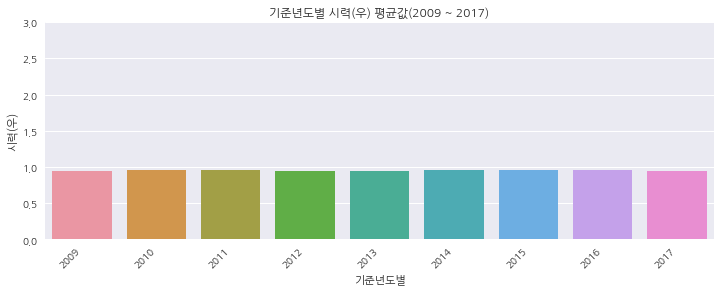

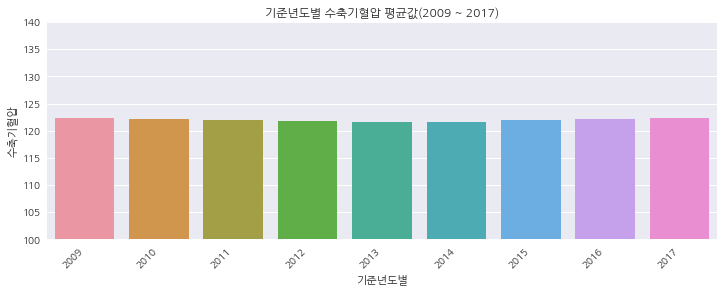

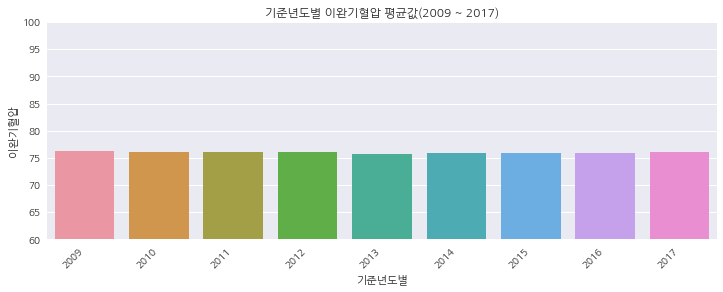

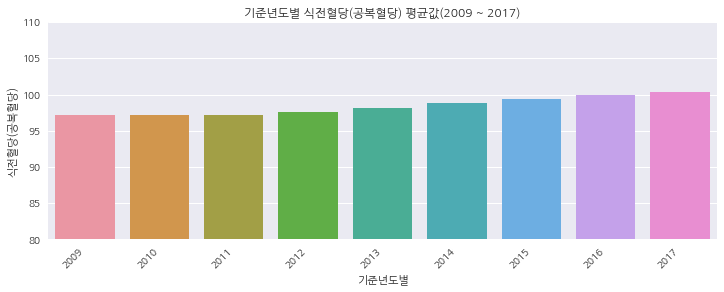

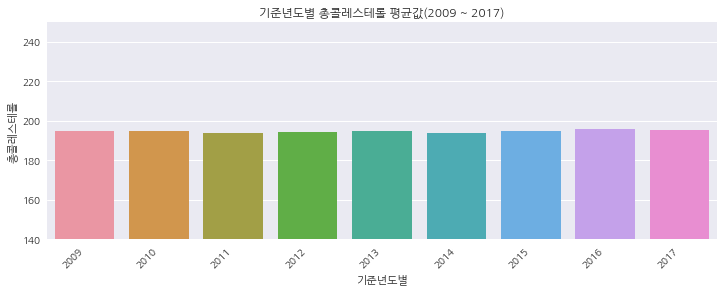

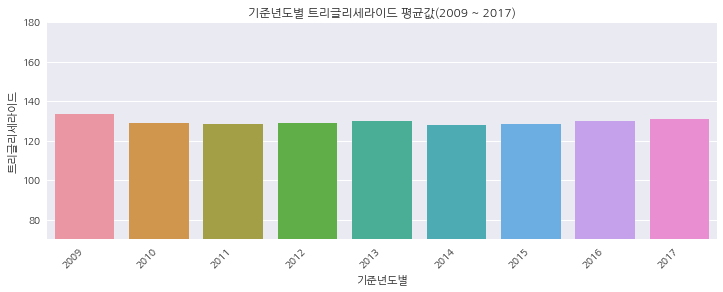

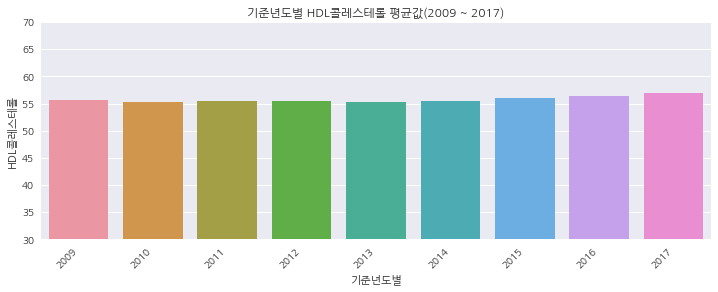

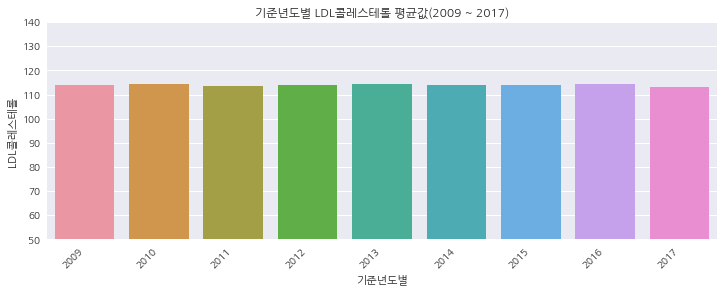

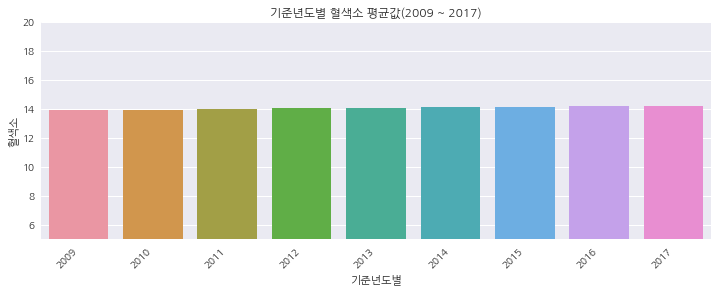

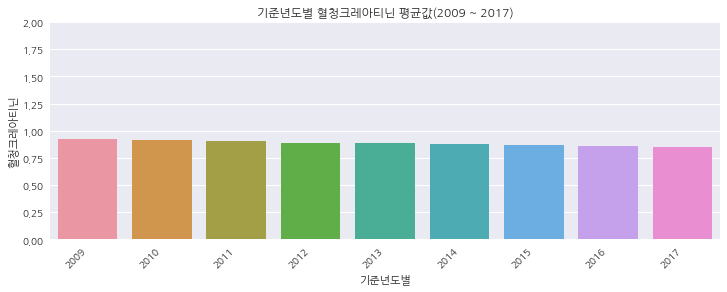

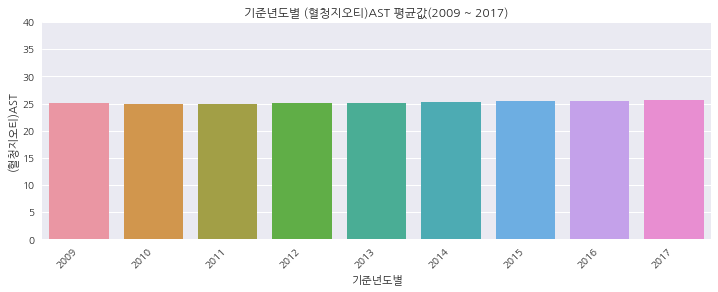

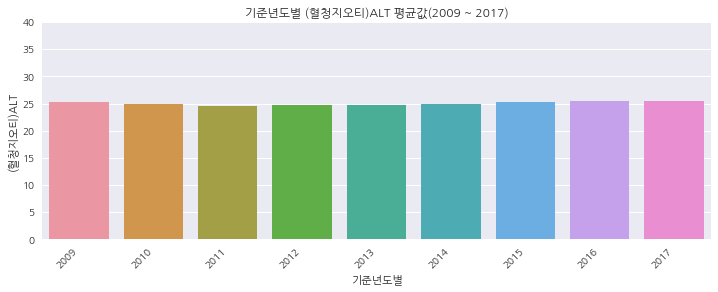

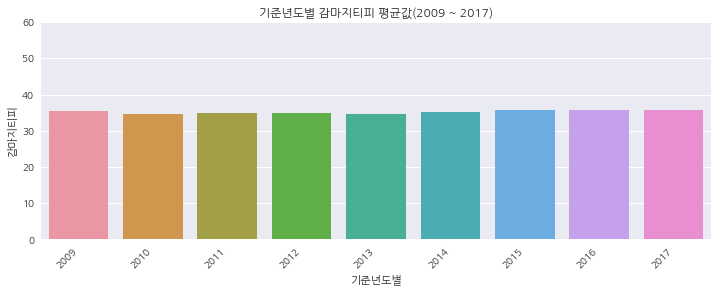

In [42]:
df_22=df.groupby(['기준년도']).mean()
def Plot(df):
#     for column in temp_lst:
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,4))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        # 한글깨짐 윈도우
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
        # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df)
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('기준년도별')
        plt.title(f'기준년도별 {column} 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/year_{column}_mean.png" ,dpi=150, bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_22)

In [43]:
df_5=df.groupby(['기준년도', '성별_CAT']).mean()[['BMI','신장(5Cm단위)','체중(5Kg단위)','허리둘레','시력(좌)', '시력(우)',
                                       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', '트리글리세라이드',
                                        'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌',
                                        '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',]]
df_5.reset_index(level=['성별_CAT'], inplace=True)
df_6=np.around(df_5.applymap(lambda x: x))

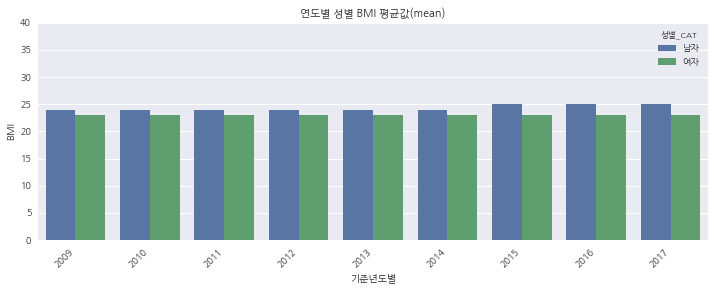

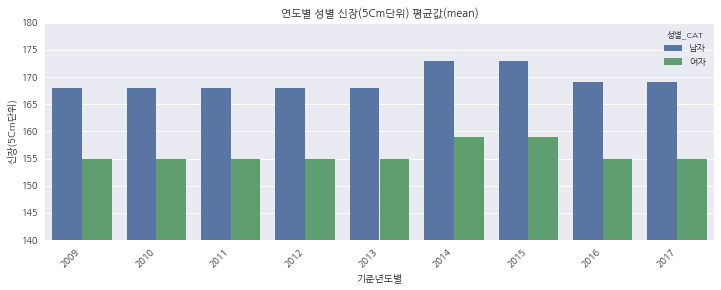

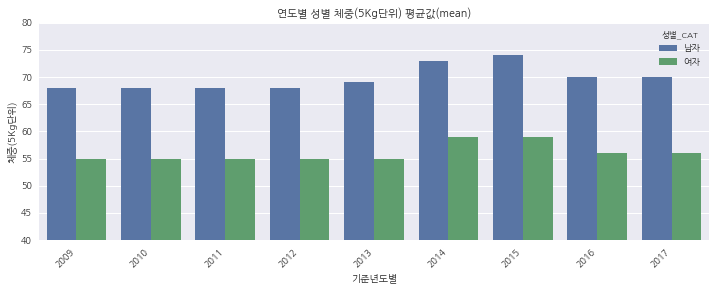

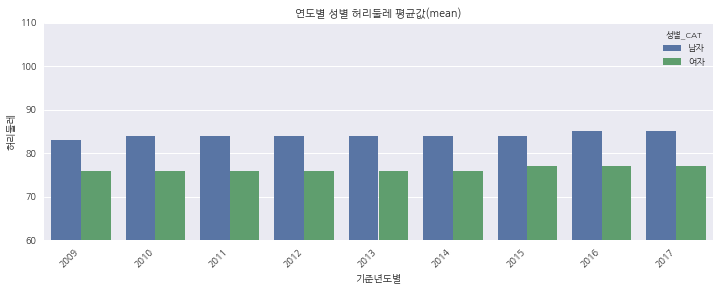

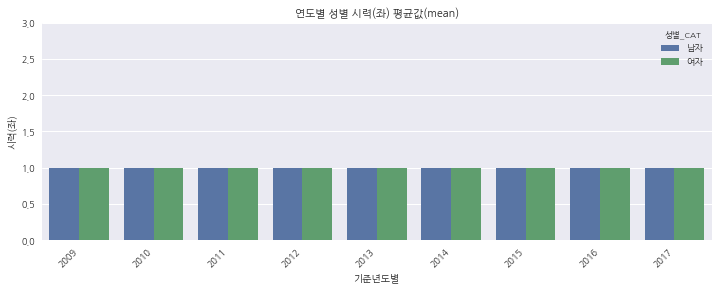

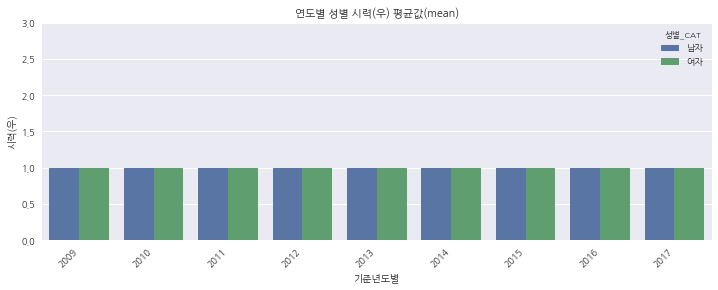

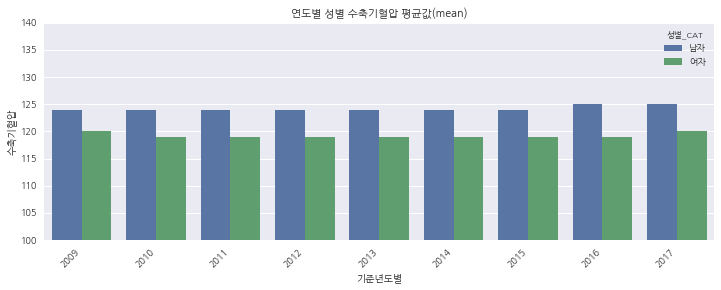

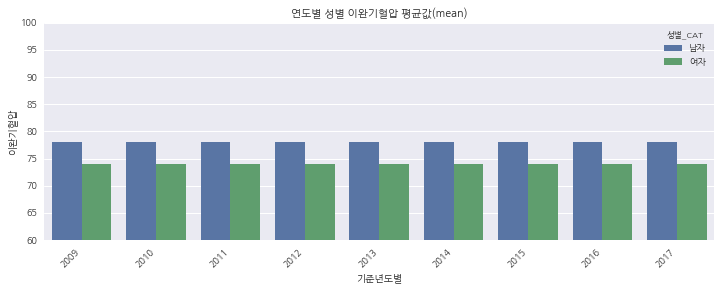

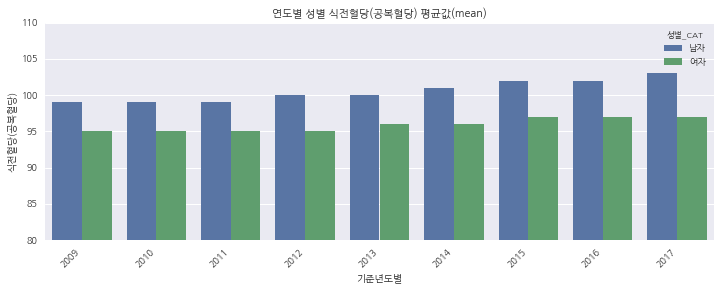

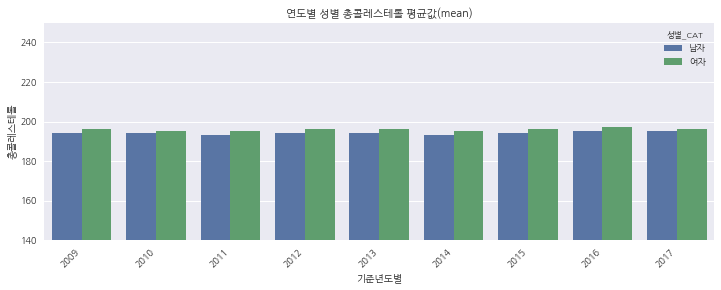

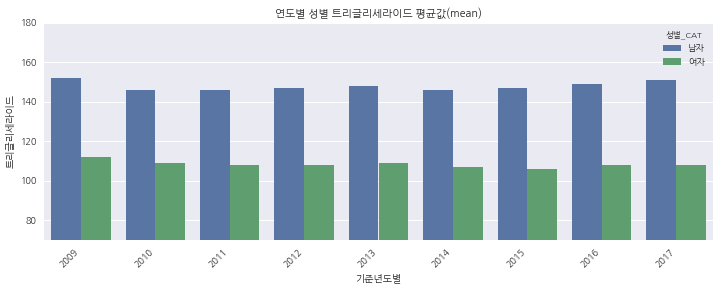

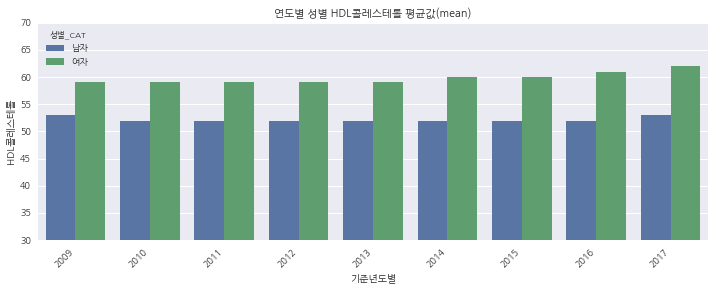

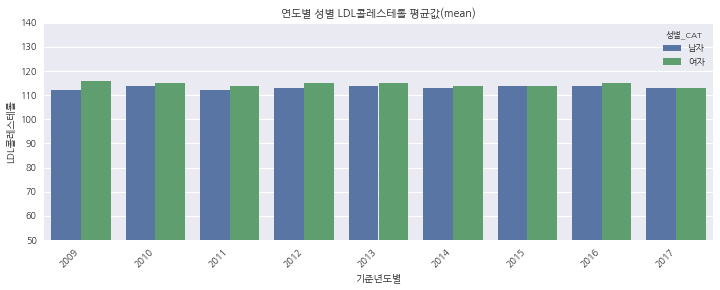

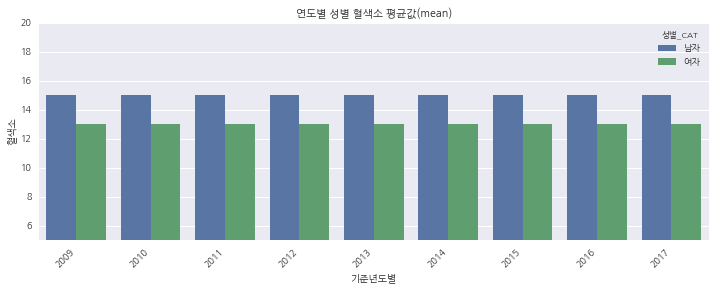

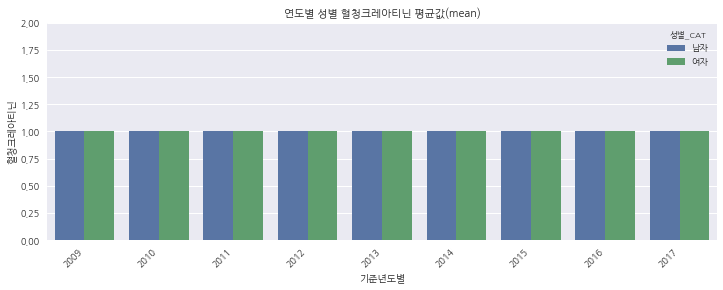

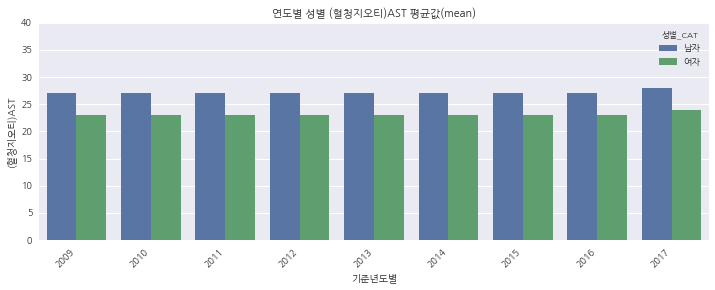

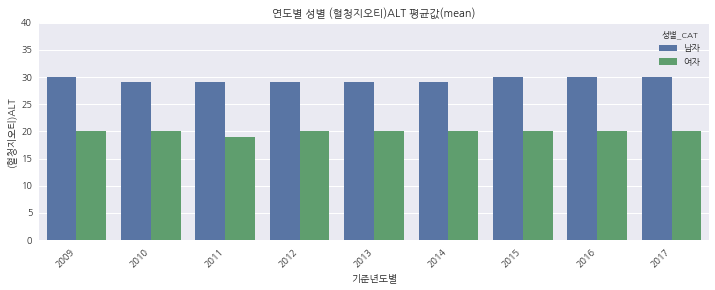

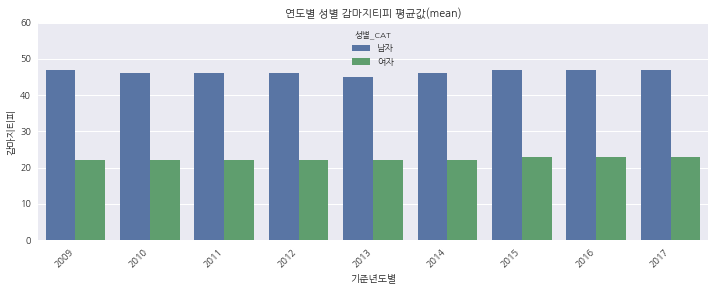

In [44]:
def Plot(df):
#     for column in temp_lst:
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,4))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=0.9)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df, hue='성별_CAT')
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('기준년도별')
        plt.title(f'연도별 성별 {column} 평균값(mean)')
        plt.savefig(f"./img/visual/year_sex_{column}_mean.png",dpi=150, bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_6)

In [45]:
#### 

In [46]:
df.columns

Index(['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       'target', 'target_CAT', '시도코드_CAT', '연령대_CAT', '성별_CAT', '흡연상태_CAT',
       '구강검진수검_CAT', '청력(좌)_CAT', '청력(우)_CAT', 'W', 'H', 'BMI', 'BMI_CAT'],
      dtype='object')

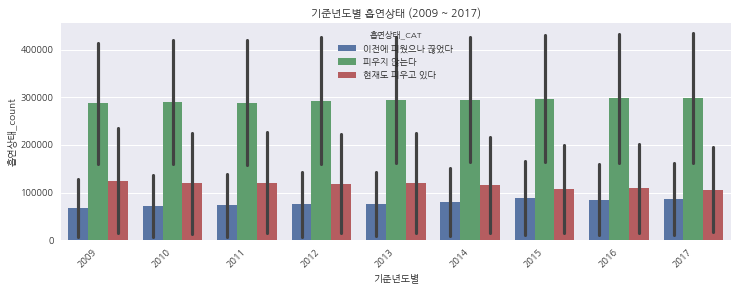

In [47]:
df_43=df.groupby(['기준년도', '성별_CAT','흡연상태_CAT'])[[ '성별코드', '흡연상태']].count()
df_43.columns = ['성별코드_count','흡연상태_count' ]
df_43 = df_43.reset_index()
df_43 = df_43.set_index('기준년도')

def Plot(df):

    plt.figure(figsize=(12,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['흡연상태_count'], data=df, hue='흡연상태_CAT')
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('기준년도별')
    plt.title(f'기준년도별 흡연상태 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/year_taboco_.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_43)

In [48]:
#### if 음주여부 feature is

In [49]:
# df_44=df.groupby(['기준년도','연령대_CAT', '음주여부_CAT'])[[ '음주여부']].count()
# df_44.columns = ['음주여부_count' ]
# df_44 = df_44.reset_index()
# df_44 = df_44.set_index('기준년도')
# df_44.head()

# def Plot(df):

#     plt.figure(figsize=(12,4))
# #     fig, ax =plt.figure(figsize=(8,4))
#     sns.set(font_scale=0.9)

# #         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
# #         mpl.rc('font', family=font_name) # ahronbd.ttf

#        # 한글깨짐 리눅스
#     mpl.rcParams['font.family'] = 'NanumGothic'
#     mpl.rc('axes', unicode_minus=False)
#     ax = sns.barplot(x=df.index, y=df['음주여부_count'], data=df, hue='음주여부_CAT')
# #         start, end = tup
# #         ax.set_ylim(start, end)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
#     ax.set_xlabel('기준년도별')
#     plt.title(f'기준년도별 음주여부 (2009 ~ 2017)')
#     plt.savefig(f"./img/visual/year_alchol_.png",dpi=150, bbox_inches='tight')
#     plt.show()
#     #     plt.close()
# Plot(df_44)

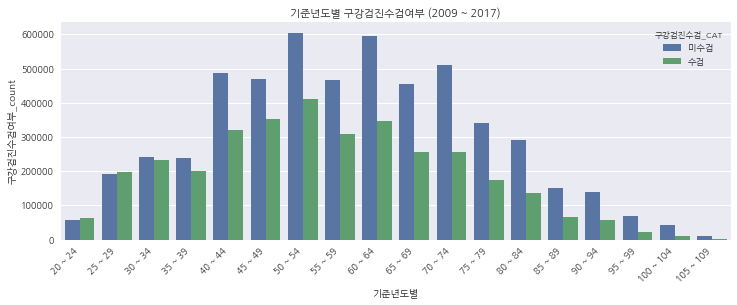

In [50]:
df_45=df.groupby(['기준년도','구강검진수검_CAT'])[[ '구강검진수검여부']].count()
df_45.columns = ['구강검진수검여부_count' ]
df_45 = df_45.reset_index()
df_45 = df_45.set_index('기준년도')
# df_35.head()

def Plot(df):

    plt.figure(figsize=(12,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['구강검진수검여부_count'], data=df, hue='구강검진수검_CAT')
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('기준년도별')
    plt.title(f'기준년도별 구강검진수검여부 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/year_gukang_.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_35)

In [51]:
df.columns

Index(['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       'target', 'target_CAT', '시도코드_CAT', '연령대_CAT', '성별_CAT', '흡연상태_CAT',
       '구강검진수검_CAT', '청력(좌)_CAT', '청력(우)_CAT', 'W', 'H', 'BMI', 'BMI_CAT'],
      dtype='object')

### 시도별

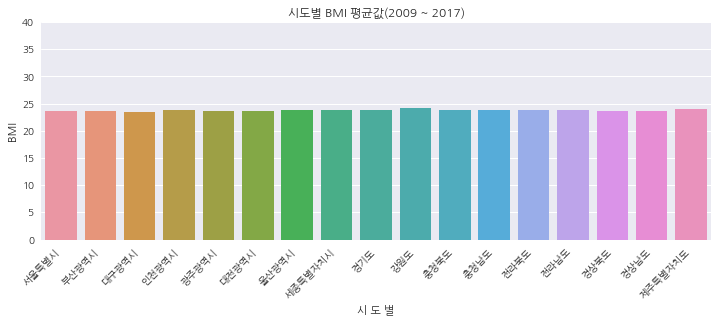

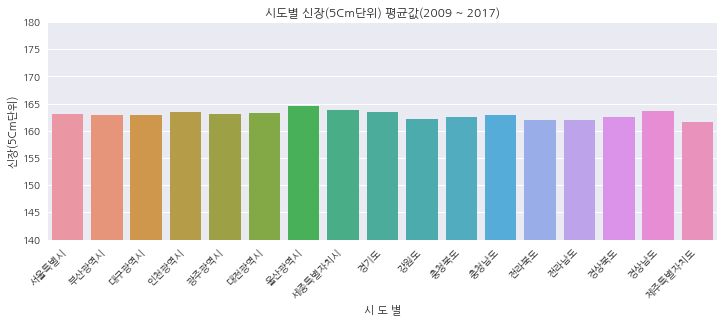

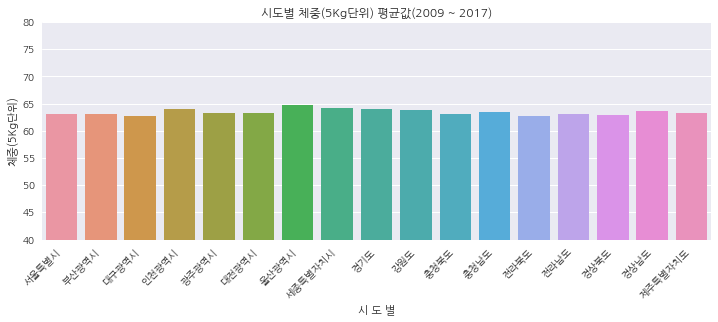

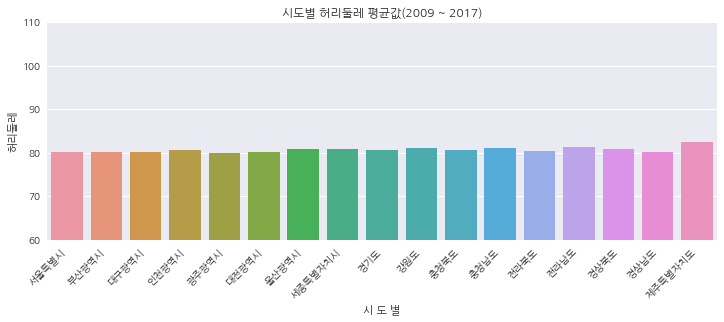

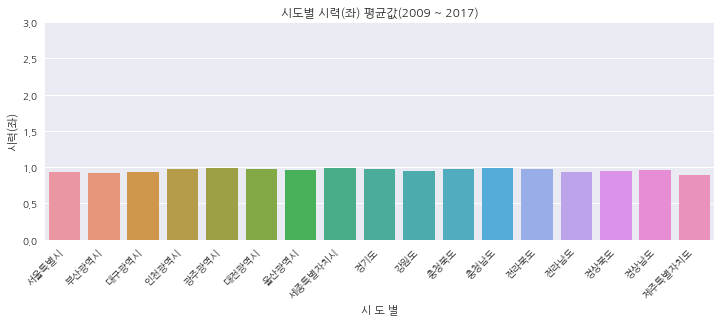

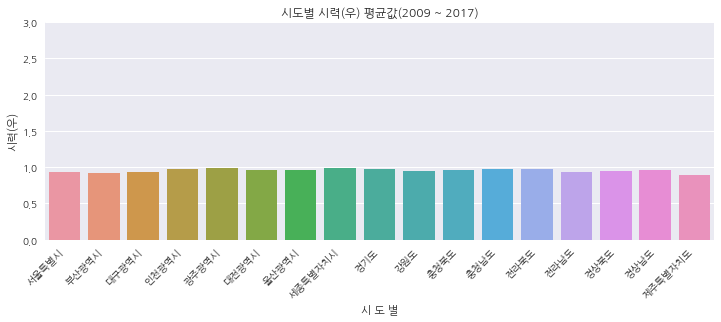

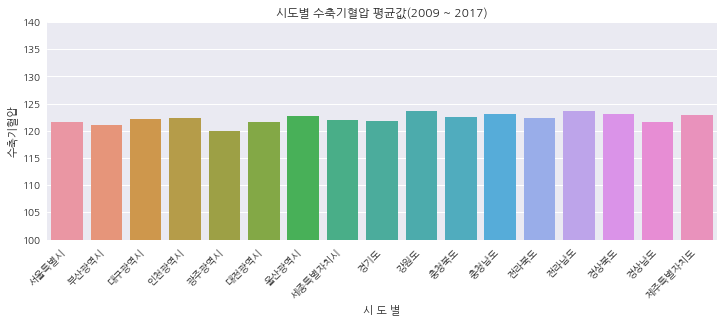

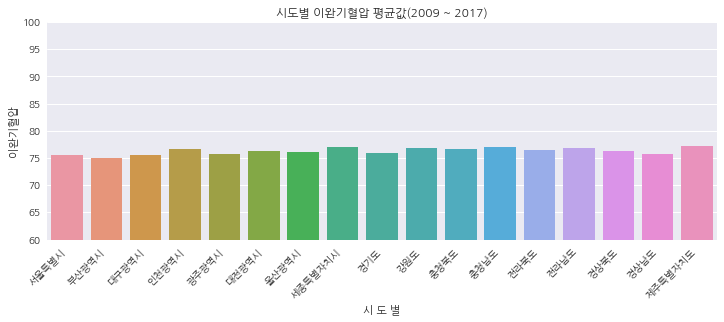

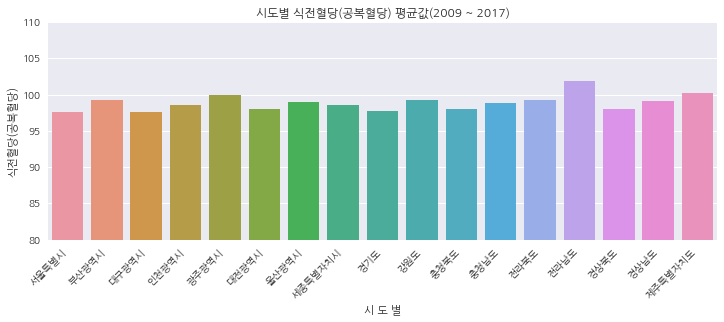

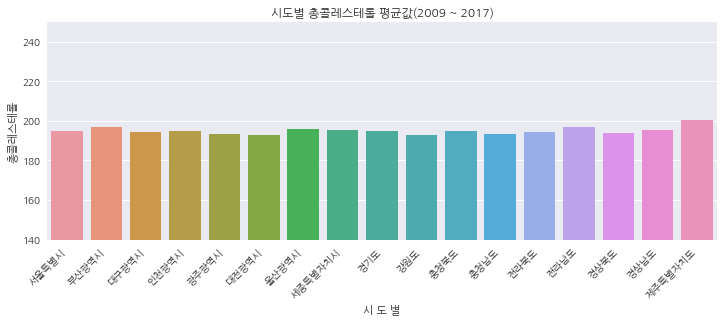

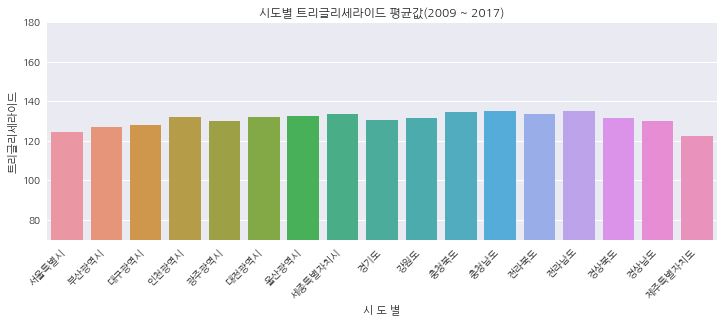

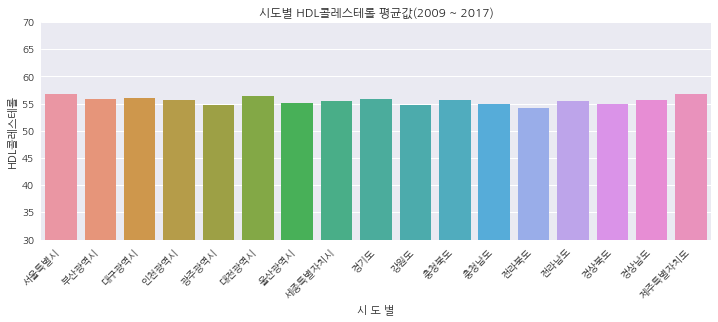

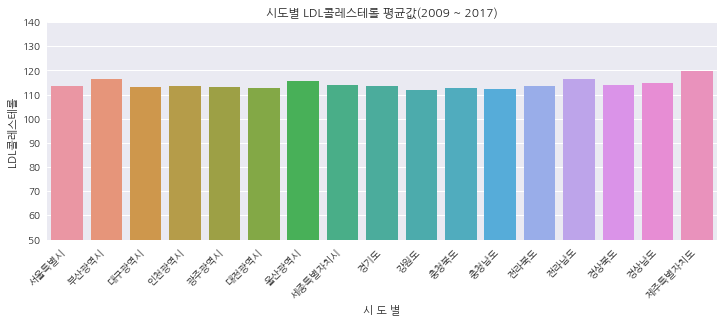

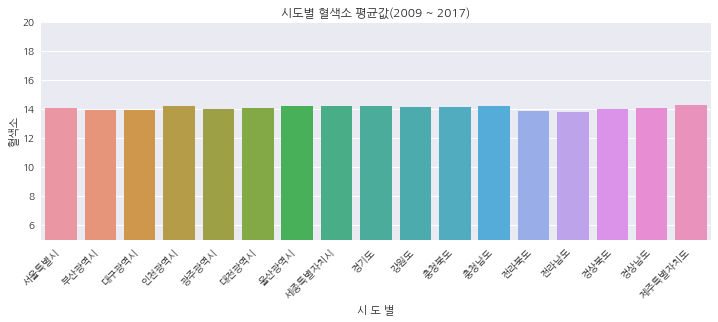

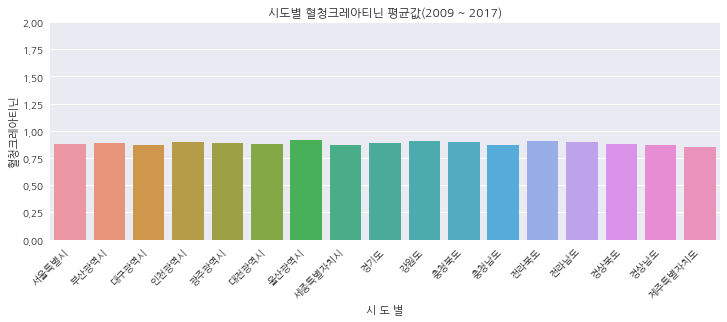

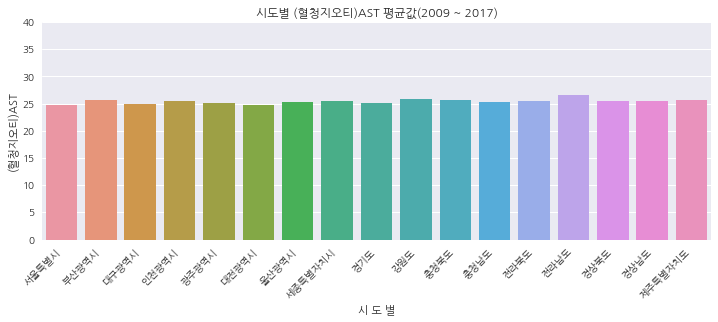

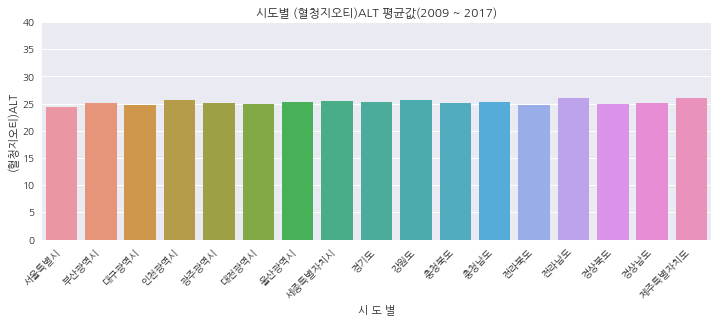

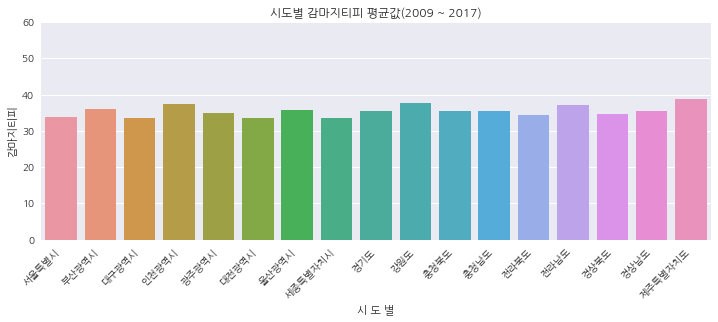

In [52]:
df_23=df.groupby(['시도코드', '시도코드_CAT']).mean()
df_23=df_23.reset_index()
df_23=df_23.set_index('시도코드_CAT')
def Plot(df):
#     for column in temp_lst:
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,4))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        # 한글깨짐 윈도우
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
        # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df)
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('시 도 별')
        plt.title(f'시도별 {column} 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/sido_{column}_mean.png" ,dpi=150, bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_23)

In [53]:
df_9=df.groupby(['시도코드','시도코드_CAT', '성별_CAT']).mean()[['BMI','신장(5Cm단위)','체중(5Kg단위)','허리둘레','시력(좌)', '시력(우)',
                                       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', '트리글리세라이드',
                                        'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌',
                                        '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',]]
# df_9=df.groupby(['시도코드','시도코드_CAT', '성별_CAT']).mean()
df_10=np.around(df_9.applymap(lambda x: x))
df_10.reset_index(level=['시도코드', '성별_CAT'], inplace=True)
df_10.drop('시도코드', axis=1, inplace=True)

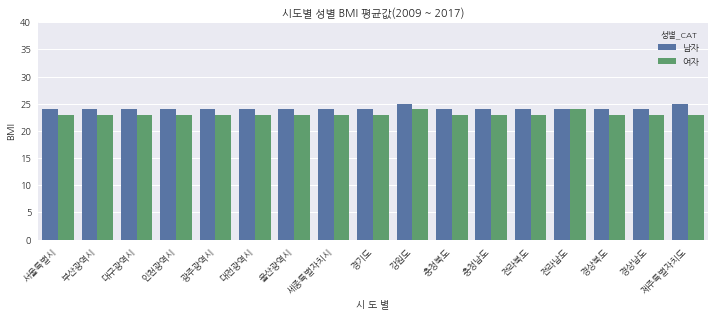

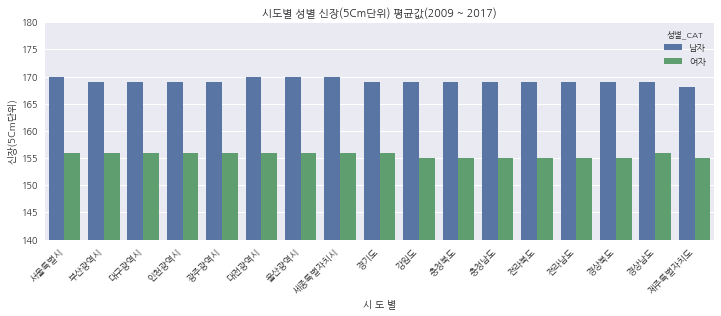

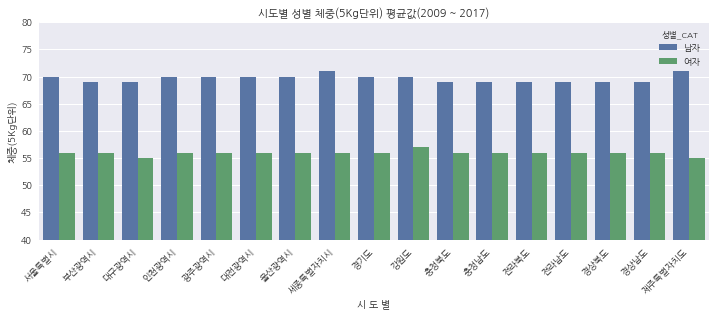

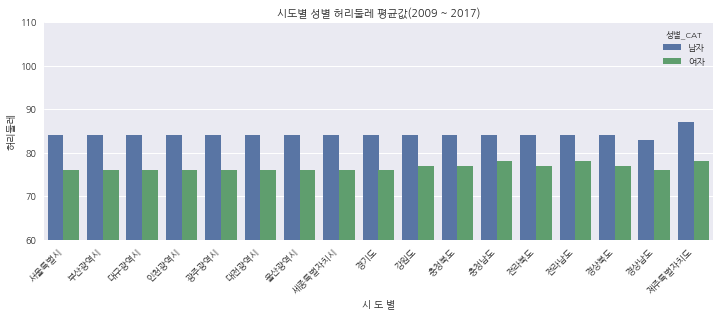

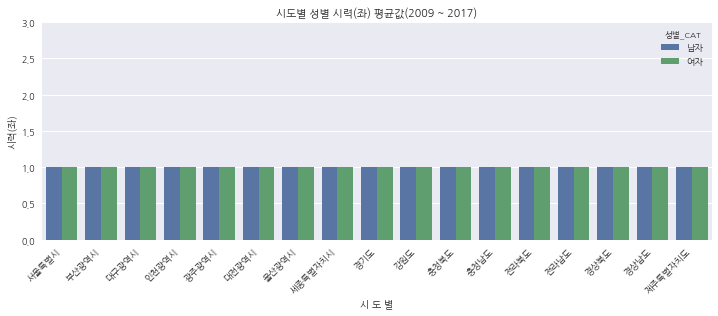

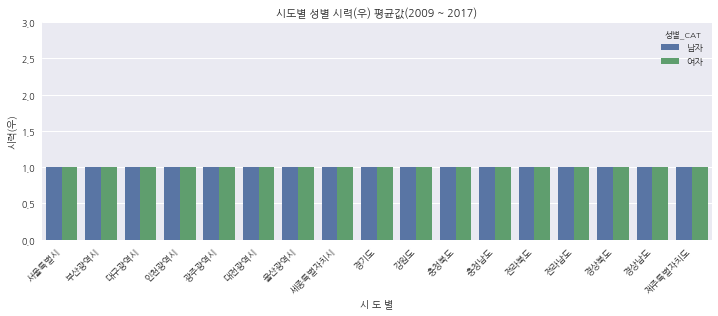

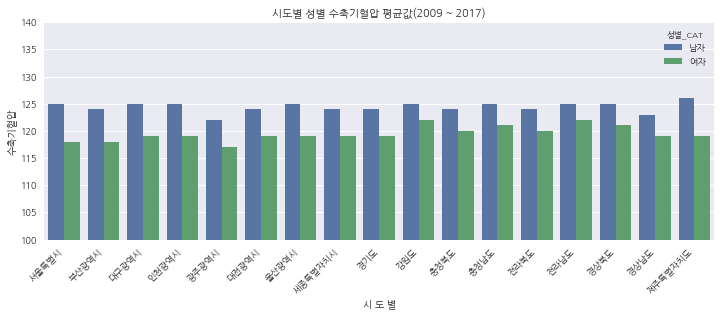

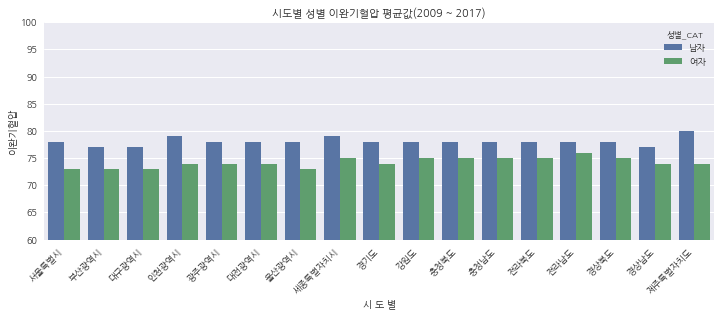

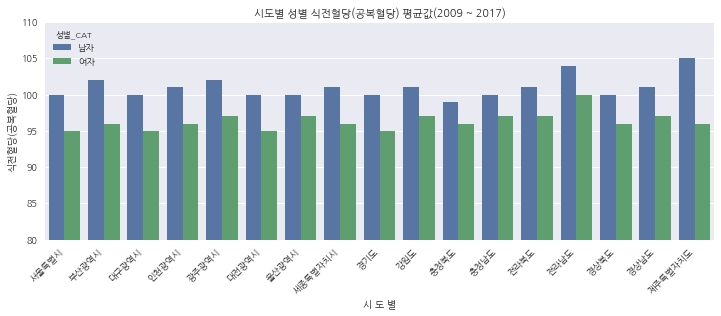

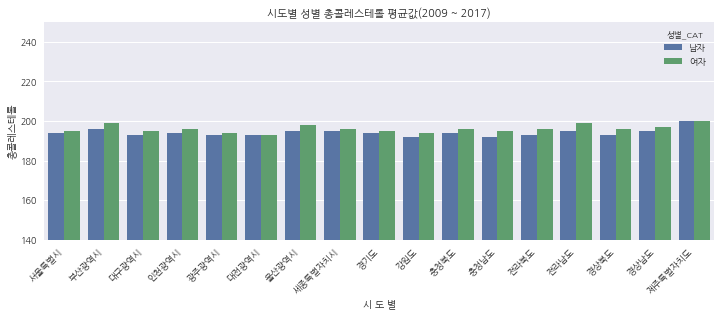

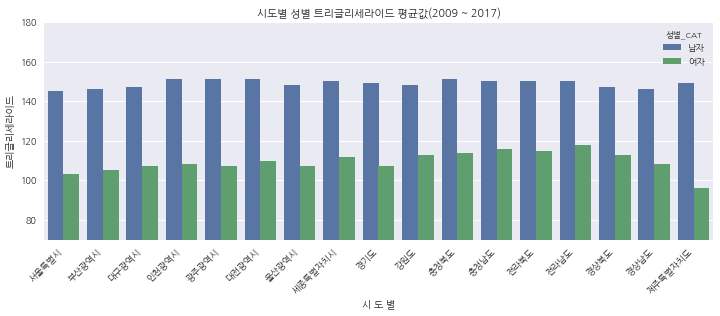

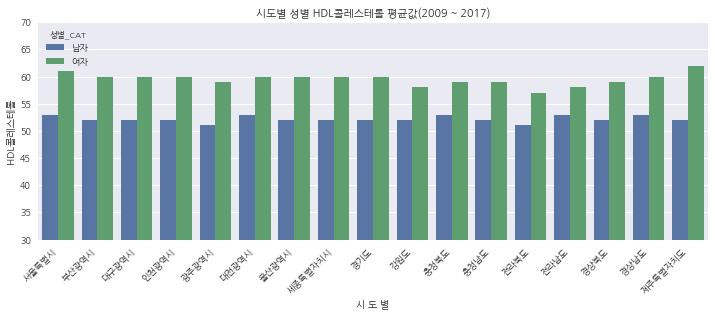

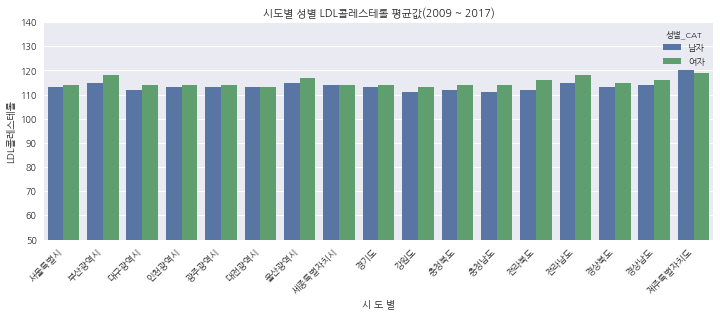

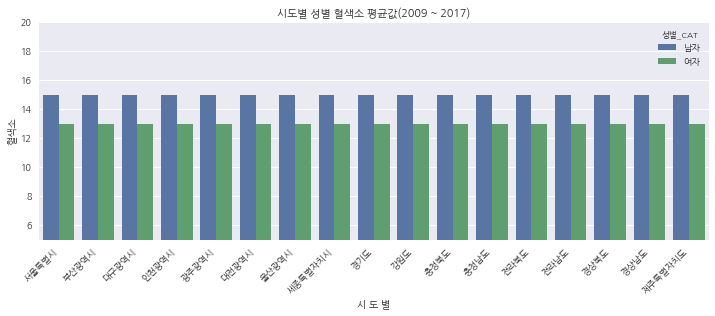

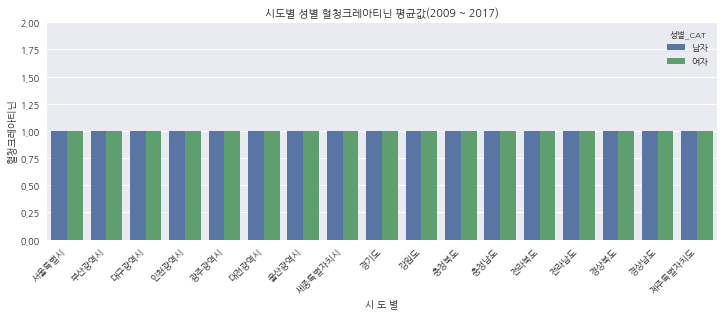

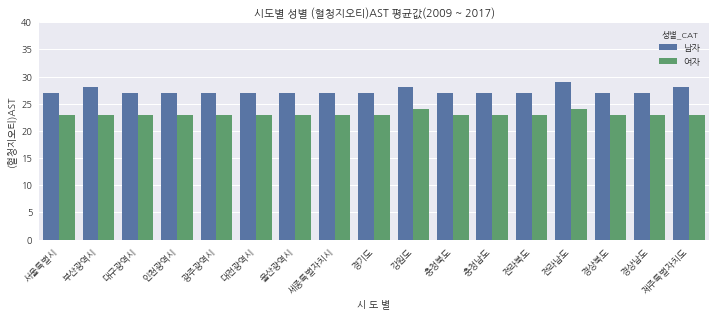

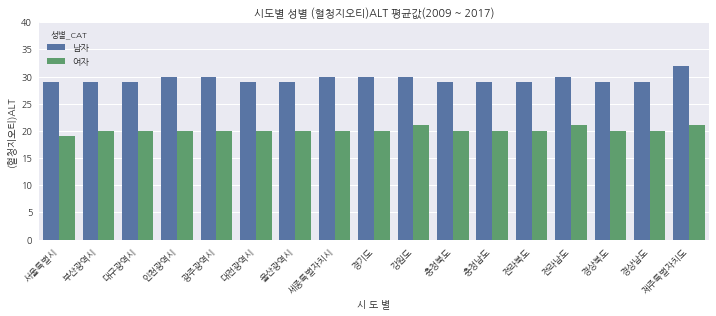

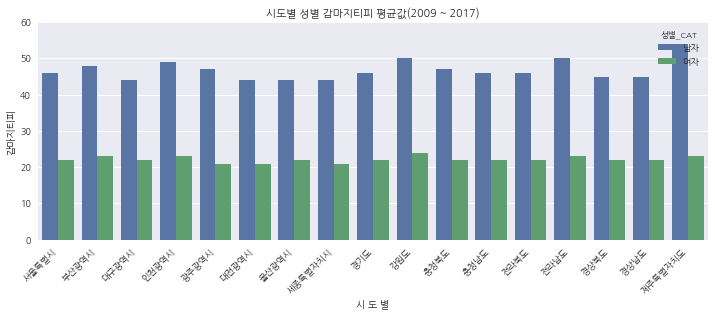

In [54]:
def Plot(df):
#     for column in temp_lst:
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,4))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=0.9)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df, hue='성별_CAT')
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('시 도 별')
        plt.title(f'시도별 성별 {column} 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/sido_sex_{column}_mean.png", dpi=150, bbox_inches='tight')
#         fig.savefig(out_fname,dpi=200,facecolor=fig.get_facecolor(),transparent=True,bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_10)

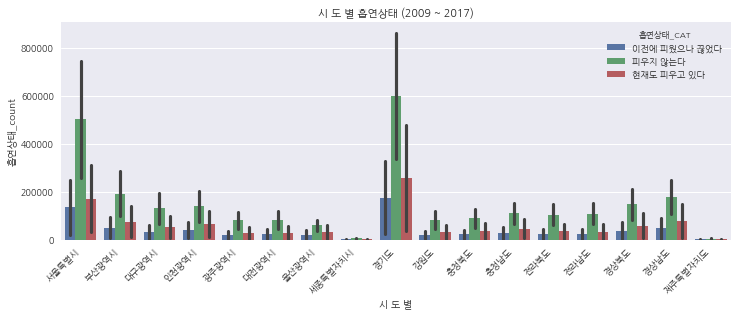

In [55]:
df_53=df.groupby(['시도코드','시도코드_CAT', '성별_CAT','흡연상태_CAT'])[[ '성별코드', '흡연상태']].count()
df_53.columns = ['성별코드_count','흡연상태_count' ]
df_53 = df_53.reset_index()
df_53 = df_53.set_index('시도코드_CAT')

def Plot(df):

    plt.figure(figsize=(12,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['흡연상태_count'], data=df, hue='흡연상태_CAT')
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('시 도 별')
    plt.title(f'시 도 별 흡연상태 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/sido_taboco_.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_53)

In [56]:
# df_44=df.groupby(['시도코드','시도코드_CAT', '음주여부_CAT'])[[ '음주여부']].count()
# df_44.columns = ['음주여부_count' ]
# df_44 = df_44.reset_index()
# df_44 = df_44.set_index('시도코드_CAT')
# df_44.head()

# def Plot(df):

#     plt.figure(figsize=(12,4))
# #     fig, ax =plt.figure(figsize=(8,4))
#     sns.set(font_scale=0.9)

# #         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
# #         mpl.rc('font', family=font_name) # ahronbd.ttf

#        # 한글깨짐 리눅스
#     mpl.rcParams['font.family'] = 'NanumGothic'
#     mpl.rc('axes', unicode_minus=False)
#     ax = sns.barplot(x=df.index, y=df['음주여부_count'], data=df, hue='음주여부_CAT')
# #         start, end = tup
# #         ax.set_ylim(start, end)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
#     ax.set_xlabel('시 도 별')
#     plt.title(f'시 도 별 음주여부 (2009 ~ 2017)')
#     plt.savefig(f"./img/visual/sido_alchol_.png",dpi=150, bbox_inches='tight')
#     plt.show()
#     #     plt.close()
# Plot(df_44)

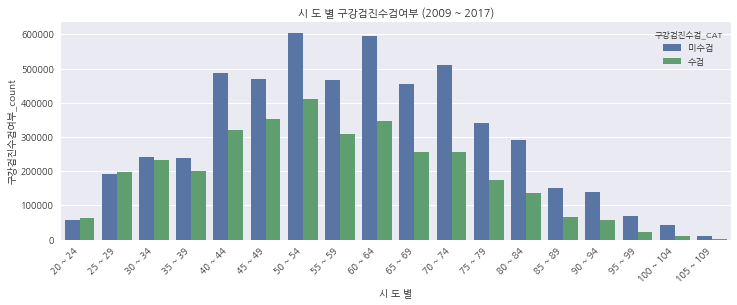

In [57]:
df_45=df.groupby(['시도코드','시도코드_CAT','구강검진수검_CAT'])[[ '구강검진수검여부']].count()
df_45.columns = ['구강검진수검여부_count' ]
df_45 = df_45.reset_index()
df_45 = df_45.set_index('시도코드_CAT')
# df_35.head()

def Plot(df):

    plt.figure(figsize=(12,4))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=0.9)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df.index, y=df['구강검진수검여부_count'], data=df, hue='구강검진수검_CAT')
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    ax.set_xlabel('시 도 별')
    plt.title(f'시 도 별 구강검진수검여부 (2009 ~ 2017)')
    plt.savefig(f"./img/visual/sido_gukang_.png",dpi=150, bbox_inches='tight')
    plt.show()
    #     plt.close()
Plot(df_35)

###  당뇨 

In [58]:
df.columns

Index(['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       'target', 'target_CAT', '시도코드_CAT', '연령대_CAT', '성별_CAT', '흡연상태_CAT',
       '구강검진수검_CAT', '청력(좌)_CAT', '청력(우)_CAT', 'W', 'H', 'BMI', 'BMI_CAT'],
      dtype='object')

In [59]:
df_11 = df.groupby(['연령대코드(5세단위)','연령대_CAT','target', 'target_CAT'])[['target']].count()
df_11.columns = ['target_count']
df_11 = df_11.reset_index()
# df_11['target_count'].sort_values(ascending=True)
df_11 = df_11.set_index('연령대_CAT')

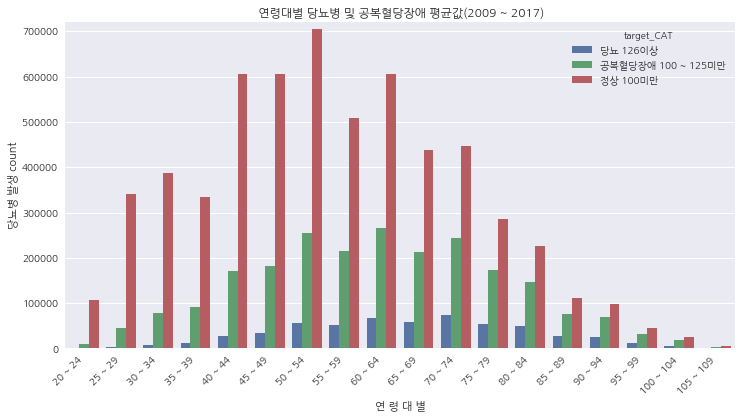

In [60]:
temp_dict={'target_count': (650,720000)}
def Plot(df):
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,6))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() 
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df, hue='target_CAT')
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('연 령 대 별')
        ax.set_ylabel('당뇨병 발생 count')
        plt.title(f' 연령대별 당뇨병 및 공복혈당장애 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/diabete_age.png", dpi=100, bbox_inches='tight')
#         fig.savefig(out_fname,dpi=200,facecolor=fig.get_facecolor(),transparent=True,bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_11)

In [61]:
df_13 = df.groupby(['기준년도', 'target', 'target_CAT'])[['target']].count()
df_13.columns = ['target_count']
df_13 = df_13.reset_index()
# df_11['target_count'].sort_values(ascending=True)
df_13 = df_13.set_index('기준년도')

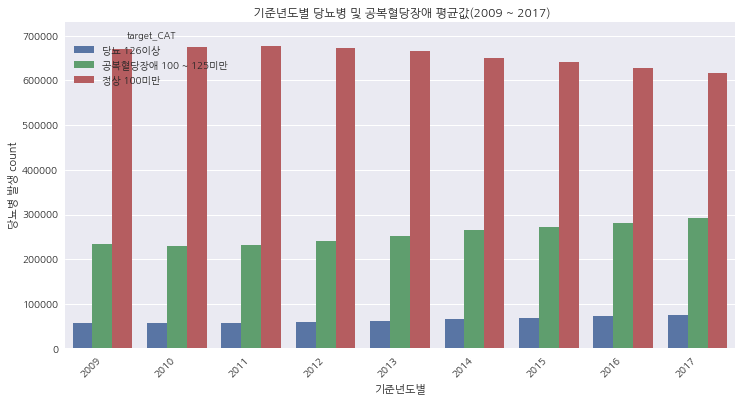

In [62]:
temp_dict={'target_count': (650,730000)}
def Plot(df):
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,6))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() 
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df, hue='target_CAT')
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('기준년도별')
        ax.set_ylabel('당뇨병 발생 count')
        plt.title(f' 기준년도별 당뇨병 및 공복혈당장애 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/diabete_year.png", dpi=100, bbox_inches='tight')
#         fig.savefig(out_fname,dpi=200,facecolor=fig.get_facecolor(),transparent=True,bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_13)

In [63]:
df_14 = df.groupby(['시도코드', '시도코드_CAT', 'target', 'target_CAT'])[['target']].count()
df_14.columns = ['target_count']
df_14 = df_14.reset_index()
# df_11['target_count'].sort_values(ascending=True)
df_14 = df_14.set_index('시도코드_CAT')
# df_14.head()

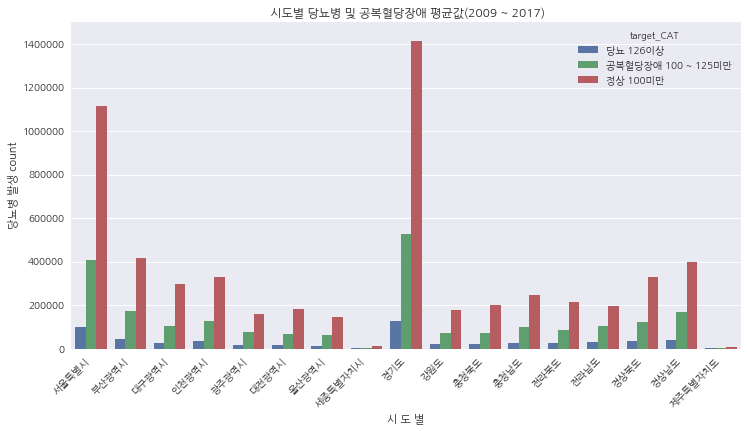

In [64]:
temp_dict={'target_count': (650,1500000)}
def Plot(df):
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,6))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() 
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df, hue='target_CAT')
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        ax.set_xlabel('시 도 별')
        ax.set_ylabel('당뇨병 발생 count')
        plt.title(f' 시도별 당뇨병 및 공복혈당장애 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/diabete_sido.png", dpi=100, bbox_inches='tight')
#         fig.savefig(out_fname,dpi=200,facecolor=fig.get_facecolor(),transparent=True,bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_14)

In [65]:
df.columns

Index(['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       'target', 'target_CAT', '시도코드_CAT', '연령대_CAT', '성별_CAT', '흡연상태_CAT',
       '구강검진수검_CAT', '청력(좌)_CAT', '청력(우)_CAT', 'W', 'H', 'BMI', 'BMI_CAT'],
      dtype='object')

In [66]:
df_333 = df.groupby(['성별_CAT','target', 'target_CAT'])[['target']].count()
df_333.columns = ['target_count']
df_333 = df_333.reset_index()
# df_11['target_count'].sort_values(ascending=True)
df_333 = df_333.set_index('성별_CAT')


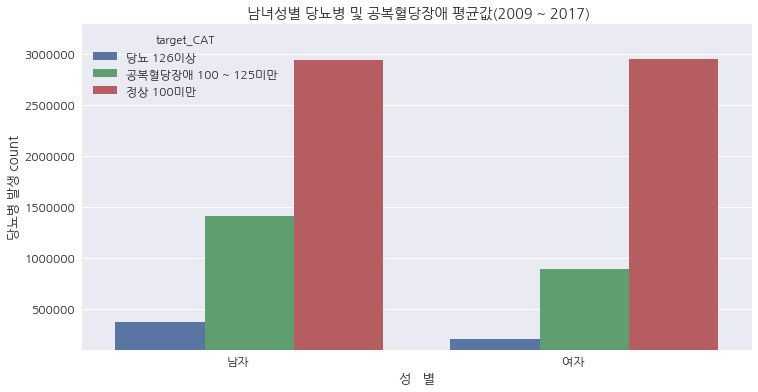

In [67]:
temp_dict={'target_count': (100000,3300000)}
def Plot(df):
    for column, tup in temp_dict.items():
        plt.figure(figsize=(12,6))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.2)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() 
#         mpl.rc('font', family=font_name) # ahronbd.ttf
        
           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = sns.barplot(x=df.index, y=column, data=df, hue='target_CAT')
        start, end = tup
        ax.set_ylim(start, end)
        ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right') 
        ax.set_xlabel('성   별')
        ax.set_ylabel('당뇨병 발생 count')
        plt.title(f' 남녀성별 당뇨병 및 공복혈당장애 평균값(2009 ~ 2017)')
        plt.savefig(f"./img/visual/diabete_sex.png", dpi=100, bbox_inches='tight')
#         fig.savefig(out_fname,dpi=200,facecolor=fig.get_facecolor(),transparent=True,bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_333)